In [69]:
# Nice clean supervised learning setup


In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [71]:
# # you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

# if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
#     raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

# BES_code_folder   = "../BES_analysis_code/" # we should be here!
# BES_small_data_files = BES_code_folder + "small data files" + os.sep
# if not os.path.exists( BES_small_data_files ):
#     os.makedirs( BES_small_data_files )

# # we should create these if they don't already exist
# BES_data_folder   = "../BES_analysis_data/"
# if not os.path.exists( BES_data_folder ):
#     os.makedirs( BES_data_folder )

# BES_output_folder = "../BES_analysis_output/"
# if not os.path.exists( BES_output_folder ):
#     os.makedirs( BES_output_folder )
    
# BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

# BES_R_data_files = BES_data_folder + "R_data" + os.sep
# if not os.path.exists( BES_R_data_files ):
#     os.makedirs( BES_R_data_files )


In [72]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from gaussian_kde import gaussian_kde
from utility import display_components, display_pca_data, weighted_kde

In [73]:
# del xgboost
xgb_dir = "C:\\Users\\Marios\\AppData\\Local\\conda\\conda\\envs\\BES_analysis\\Lib\\site-packages\\xgboost"
import sys, os
sys.path.append(xgb_dir)
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, cv, plot_tree

# First XGBoost model for Pima Indians dataset
import graphviz

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

from boostaroota import BoostARoota

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from boruta import BorutaPy

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

import shap
shap.initjs()

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from xgboost_tuner.tuner import tune_xgb_params

In [74]:
# conda install -c anaconda py-xgboost
import xgboost as xgb

In [75]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set();
sns.set_palette("colorblind")
from IPython.display import display, display_html, HTML
plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [76]:
dataset_name = "W13_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric",
           "BES_reduced",
#            "BESnumeric"
          ]

# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()

global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.


var_type (5173, 12)


In [77]:
# dataset_name = "W13_comb"

In [78]:
# %%time

# manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

# data_subfolder = BES_data_folder + dataset_name + os.sep

# dataset_filename = manifest["Stata_Filename"].values[0]
# # dataset_description = manifest["Friendlier_Description"].values[0]
# # dataset_citation = manifest["Citation"].values[0]
# # dataset_start = manifest["Date_Start"].values[0]
# # dataset_stop = manifest["Date_Stop"].values[0]
# # dataset_wave = manifest["Wave No"].values[0]

# BES_Panel  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
# print("BES_Panel", BES_Panel.shape )

In [79]:
# ####

# # BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
# # print("BES_numeric",  BES_numeric.shape )
# try:
#     var_type    = pd.read_hdf( data_subfolder + "var_type.hdf", encoding=encoding)
# except:
#     var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
#     var_type.set_index("Unnamed: 0", inplace=True)
# print("var_type",  var_type.shape )

# fname = data_subfolder + "cat_dictionary.pkl"
# with open(fname, "rb") as f:
#     cat_dictionary = pickle.load( f )
    
# ####

# # BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
# # print("BES_non_numeric",  BES_non_numeric.shape )

# BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
# print("BES_reduced",  BES_reduced.shape )

# # BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
# # print("BES_reduced_with_na", BES_reduced_with_na.shape )

# # fname = data_subfolder + "new_old_col_names.pkl"
# # with open(fname, "rb") as f:
# #     new_old_col_names = pickle.load(f) 

In [80]:
# fname = data_subfolder + "new_old_col_names.pkl"
# with open(fname, "rb") as f:
#     new_old_col_names = pickle.load(f) 

In [81]:
# Reduction process

# median imputation

# many_cat_drop_list

# high_corr_drop_list


In [82]:
## augment dataset
# pan_dataset_values
# census data
# 

pan_dataset_values = pd.read_csv( BES_small_data_files + "pan_dataset_values.csv", encoding=encoding)    

In [83]:
# http://www.britishelectionstudy.com/data-object/2017-bes-constituency-results-with-census-and-candidate-data/
BES_census_data = pd.read_stata( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
print("BES_census_data", BES_census_data.shape )

pano_var_dict = {int(x.replace("panoW","")):x for x in BES_Panel.columns if "pano" in x}
sorted_pano_vars = [ pano_var_dict[x] for x in sorted( pano_var_dict.keys() ) ]

BES_reduced_with_na["pano"] = BES_Panel[sorted_pano_vars].bfill(axis=1).iloc[:, 0]


# len()
census_vars = [x for x in BES_census_data.columns if re.match('c\w',x) ]
census_vars.append("leaveHanretty")
census_vars.append("remainHanretty")
census_vars.append("pano")
# ConstituencyType
BES_reduced_with_na = pd.merge(BES_reduced_with_na, BES_census_data[census_vars], how = 'left', on = 'pano')



One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


BES_census_data (632, 308)


In [84]:
def get_base(im_var, waves=None, noNans = False):

    if waves:
        wave_list = waves
    else:
        wave_list = [x.replace(im_var,"") for x in BES_Panel.columns if re.match(im_var+"W\d+$",  x)]
        
    immig_vars = [im_var+x for x in wave_list]
    if noNans:
        all_in_dataset = BES_Panel[immig_vars].notnull().all(axis=1)

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars][all_in_dataset]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
    else:
        all_in_dataset = BES_Panel[immig_vars].isnull()
        
        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
        
        BES_immig[all_in_dataset] = np.nan
        all_in_dataset = ~all_in_dataset
        
        
    return BES_immig, all_in_dataset

imvar_list = ["immigEcon","immigCultural", "immigSelf",
             "immigrationLevel", "immigContributeTake",
             "immigrantsWelfareState", "controlImmig",
             "effectsEUImmigration", "euPriorityBalance",
             "changeImmig", "changeImmigLab",
             "govtHandleImmig", "labHandleImmig",
             "asylumMore", "euMore", "noneuMore", "studentsMore", "familiesMore",
             "ukCoopMovement"]

# im_var = "immigCultural"

num = 0
for im_var in imvar_list:
    immig, mask = get_base(im_var,noNans = False)
    immig.columns = ["Delta_"+x for x in immig.columns]
    if num ==0:
        immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
    else:
        immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1

In [85]:
# add both together
im_var = "immigEcon"
immig_econ,mask = get_base(im_var,waves=["W8"],noNans = False)
mask = (immig_econ < immig_econ.median())[im_var+"W8"]
mask = (mask & immigDiff["Delta_immigSelfW10"].notnull() & immigDiff["Delta_controlImmigW9"].notnull())

BES_immigEcon = pd.concat( [BES_reduced[mask],immigDiff[[x for x in immigDiff.columns if "W10" in x]][mask]], axis=1)
BES_immigEcon = BES_immigEcon.drop(["Delta_changeImmigLabW10"],axis=1, errors='ignore')
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigEcon" in x], axis=1)
BES_immigEcon = BES_immigEcon.drop([x for x in BES_immigEcon.columns if "immigCultural" in x], axis=1)
BES_immigEcon["Delta_controlImmigW9"] = immigDiff["Delta_controlImmigW9"][mask]
# BES_immigEcon = BES_immigEcon[var_list]


target = immigDiff["Delta_immigEconW10"][mask] + immigDiff["Delta_immigCulturalW10"][mask]
new_target = round(6*target).apply(lambda x: min(x,10))
new_target = new_target.astype('category')
new_target

0       -1.0
83       0.0
88       1.0
124      5.0
127      1.0
        ... 
56577    3.0
56612    2.0
56620    4.0
56625    2.0
56630    0.0
Length: 1721, dtype: category
Categories (17, float64): [-6.0, -5.0, -4.0, -3.0, ..., 7.0, 8.0, 9.0, 10.0]

In [86]:
X = BES_immigEcon
y = new_target

In [87]:
X.dtypes

ageW1                                                  int8
turnoutUKGeneralW1__Very likely that I will vote       int8
turnoutUKGeneralW2__Very likely that I will vote       int8
turnoutUKGeneralW3__Very likely that I will vote       int8
turnoutUKGeneralW4__Very likely that I will vote       int8
                                                     ...   
Delta_controlImmigW10                               float64
Delta_effectsEUImmigrationW10                       float64
Delta_changeImmigW10                                float64
Delta_ukCoopMovementW10                             float64
Delta_controlImmigW9                                float64
Length: 5703, dtype: object

In [88]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet


In [89]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='median')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42, stratify = y)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline , parameters , cv = 3)

# Fit to the training set
gm_cv.fit( X_train, y_train )

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Objective did not converge. You might want to increase the number of iterations. Duality gap: 388.34914668439905, tolerance: 0.3816579941860464
Objective did not converge. You might want to increase the number of iterations. Duality gap: 415.02282175324785, tolerance: 0.42077906976744184
Objective did not converge. You might want to increase the number of iterations. Duality gap: 342.56769866002804, tolerance: 0.34871031976744205


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.11808536821498339


In [90]:
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X)

In [91]:
[x for x in BES_Panel.columns if "subject" in x.lower()]

['subjectHEW1W2W3', 'subjectHECurrentW1W2W3']

In [92]:
gm_cv.best_estimator_

Pipeline(memory=None,
         steps=[('imputation',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
                 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                            l1_ratio=0.20689655172413793, max_iter=1000,
                            normalize=False, positive=False, precompute=False,
                            random_state=None, selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [93]:
coef_df = pd.DataFrame(gm_cv.best_estimator_.named_steps['elasticnet'].coef_, index = X.columns)
coef_df[0].replace(0, np.nan).dropna().sort_values()

ukCoopMovementW10__Bad for Britain                                        -0.087055
achieveReduceImmigUKIPW10_Yes                                             -0.077731
polKnowMilibandW1W2W3_Leader of the Labour Party                          -0.048493
Delta_ukCoopMovementW10                                                   -0.040110
immigGreenW8__Allow many more                                             -0.035405
Delta_immigrantsWelfareStateW10                                           -0.030657
euPriorityBalanceW12__Control immigration                                 -0.028640
noChanceCoalitionGrnW12_Yes                                               -0.024799
changeImmigW10__Getting a lot higher                                      -0.024685
eesEUIntegrationLDW6__Unification should be pushed further                -0.023979
immigrantsWelfareStateW11__Strongly agree                                 -0.019728
britishnessW7__Very strongly British                                      -0

In [94]:
gc.collect()

124

In [95]:
### I believe this is a version of BES_reduced_with_na with less variables dropped due to high missing value %

In [96]:
# ## set up xgboost with missing values!
# complete_data_subfolder = '../BES_analysis_data/W13_comb_complete\\'
# BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
# print("BES_reduced_with_na", BES_reduced_with_na.shape )

# fname = data_subfolder + "new_old_col_names.pkl"
# with open(fname, "rb") as f:
#     new_old_col_names = pickle.load(f) 


In [97]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [98]:
def get_base(im_var, waves=None, noNans = False):
    skip = False
    if waves:
        wave_list = waves
    else:
        wave_list = [x.replace(im_var,"") for x in BES_Panel.columns if re.match(im_var+"W\d+$",  x)]
#     if not wave_list:
#         skip = True
#         return None, None, skip
#     else:
    immig_vars = [im_var+x for x in wave_list]
    if any([(x not in BES_Panel.columns) for x in immig_vars]):
        skip = True
        return None, None, skip, wave_list
    if noNans:
        all_in_dataset = BES_Panel[immig_vars].notnull().all(axis=1)

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars][all_in_dataset]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range
    else:
        all_in_dataset = BES_Panel[immig_vars].isnull()

        max_range = len(BES_Panel[immig_vars[0]].cat.categories.drop("Don't know",errors='ignore'))-1
        BES_immig = BES_Panel[immig_vars]\
        .replace("Don't know",np.nan)\
        .apply(lambda x: x.cat.codes)\
        .replace(-1,np.nan)\
        .apply(lambda x: x.fillna(x.median())) / max_range

        BES_immig[all_in_dataset] = np.nan
        all_in_dataset = ~all_in_dataset


    return BES_immig, all_in_dataset, skip, wave_list

In [99]:
imvar_list = ["immigEcon","immigCultural", "immigSelf",
             "immigrationLevel", "immigContributeTake",
             "immigrantsWelfareState", "controlImmig",
             "effectsEUImmigration", "euPriorityBalance",
             "changeImmig", "changeImmigLab",
             "govtHandleImmig", "labHandleImmig",
             "asylumMore", "euMore", "noneuMore", "studentsMore", "familiesMore",
              
             "ukCoopMovement","ukCoopTrade","ukCoopWorkers","ukCoopCAP","ukCoopEuro",
             "trustMPs", "polAttention", "discussPolDays",
             "benefitsToMigrants",
             "europeanness","englishness","britishness",
             "populism1","populism2","populism4","populism5","populism6",
             "EUIntegrationSelf", "harkBack", "euLeaveBigBusiness",
             "coalitionInTune", "happyEULeave", "overseasAid",
             "euLeaveScotIndep","effectsEUTerror","effectsEUTrade","effectsEUUnemployment",
             "effectsEUWorkers","effectsEUEcon","effectsEUFinance","effectsEUNHS",
             "certaintyUKLeave","certaintyUKRemain",
             "satDemUK", "satDemEU", "satDemEng",
             "prefTradeoff","beliefTradeoff",
             "euRefDoOver","expectAccess","handleEUNegotiate"              
             
             ]

In [100]:
num = 0
for im_var in imvar_list:
    print(im_var)
    #wave_list = ['W1', 'W2', 'W3', 'W4', 'W7', 'W8', 'W10', 'W11', 'W13']
    wave_list = []
    immig, mask, skip, wave_list = get_base(im_var,waves = wave_list,noNans = False)
    prev_wave_list = ["W0"]
    prev_wave_list.extend(wave_list)
    prev_wave_dict = {immig.columns[pos]:prev_wave_list[pos] for pos in range(0,len(immig.columns)) }
    if not skip:
        immig.columns = ["("+prev_wave_dict[x]+"->)"+x for x in immig.columns]
        if num ==0:
            immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
        else:
            immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1
    
null_columns = immigDiff.columns[immigDiff.isnull().all()]
if null_columns.any():
    immigDiff = immigDiff.drop( null_columns[0] , axis=1, errors= 'ignore')

immigEcon
immigCultural
immigSelf
immigrationLevel
immigContributeTake
immigrantsWelfareState
controlImmig
effectsEUImmigration
euPriorityBalance
changeImmig
changeImmigLab
govtHandleImmig
labHandleImmig
asylumMore
euMore
noneuMore
studentsMore
familiesMore
ukCoopMovement
ukCoopTrade
ukCoopWorkers
ukCoopCAP
ukCoopEuro
trustMPs
polAttention
discussPolDays
benefitsToMigrants
europeanness
englishness
britishness
populism1
populism2
populism4
populism5
populism6
EUIntegrationSelf
harkBack
euLeaveBigBusiness
coalitionInTune
happyEULeave
overseasAid
euLeaveScotIndep
effectsEUTerror
effectsEUTrade
effectsEUUnemployment
effectsEUWorkers
effectsEUEcon
effectsEUFinance
effectsEUNHS
certaintyUKLeave
certaintyUKRemain
satDemUK
satDemEU
satDemEng
prefTradeoff
beliefTradeoff
euRefDoOver
expectAccess
handleEUNegotiate


In [101]:
# takes a while!
ec_var_list = [x for x in BES_reduced_with_na.columns if "immigEcon" in x] 
# [x.replace("Econ","Cultural") for x in ec_var_list]
for ec_var in ec_var_list:
    cult_var = ec_var.replace("Econ","Cultural").replace("Good for economy","Enriches cultural life")
    merg_var = ec_var.replace("Econ","Cult_plus_Ec").replace("Good for economy","Positive")
    print(ec_var,cult_var,merg_var)
    BES_reduced_with_na[merg_var] = BES_reduced_with_na[[ec_var,cult_var]].mean(axis=1)

immigEconW1__Good for economy immigCulturalW1__Enriches cultural life immigCult_plus_EcW1__Positive
immigEconW2__Good for economy immigCulturalW2__Enriches cultural life immigCult_plus_EcW2__Positive
immigEconW3__Good for economy immigCulturalW3__Enriches cultural life immigCult_plus_EcW3__Positive
immigEconW4__Good for economy immigCulturalW4__Enriches cultural life immigCult_plus_EcW4__Positive
immigEconW7__Good for economy immigCulturalW7__Enriches cultural life immigCult_plus_EcW7__Positive
immigEconW8__Good for economy immigCulturalW8__Enriches cultural life immigCult_plus_EcW8__Positive
immigEconW10__Good for economy immigCulturalW10__Enriches cultural life immigCult_plus_EcW10__Positive
immigEconW11__Good for economy immigCulturalW11__Enriches cultural life immigCult_plus_EcW11__Positive
immigEconW13__Good for economy immigCulturalW13__Enriches cultural life immigCult_plus_EcW13__Positive


In [102]:
ec_var_list = [x for x in immigDiff.columns if re.match("\(W\d+->\)immigEcon",x)] 
# [x.replace("Econ","Cultural") for x in ec_var_list]
for ec_var in ec_var_list:
    cult_var = ec_var.replace("Econ","Cultural")
    merg_var = ec_var.replace("Econ","Cult_plus_Ec")
    immigDiff[merg_var] = immigDiff[[ec_var,cult_var]].mean(axis=1)

In [103]:
var_stub = "immigCult_plus_Ec"
var_list = [x for x in immigDiff.columns if var_stub in x]
var_stub_list = ["immigCultural","immigEcon","immigCult_plus_Ec"]
base_list = [x for x in BES_reduced_with_na.columns if var_stub in x][0:len(var_list)]
var_list

['(W1->)immigCult_plus_EcW2',
 '(W2->)immigCult_plus_EcW3',
 '(W3->)immigCult_plus_EcW4',
 '(W4->)immigCult_plus_EcW7',
 '(W7->)immigCult_plus_EcW8',
 '(W8->)immigCult_plus_EcW10',
 '(W10->)immigCult_plus_EcW11',
 '(W11->)immigCult_plus_EcW13']

In [104]:
num_to_wave = {x:"W"+str(x) for x in range(1,14)}
num_to_weight = { y:[x for x in BES_Panel.columns.sort_values(ascending=False) if re.match("wt_(new|full)_W"+str(y)+"$",x)][0] for y in range(1,14) }

(W1->)immigCult_plus_EcW2 2
missing vals in sample weights: 8


Series.base is deprecated and will be removed in a future version


[18:13:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.462814
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.446652
[2]	validation_0-rmse:0.431318
[3]	validation_0-rmse:0.416653
[4]	validation_0-rmse:0.402647
[5]	validation_0-rmse:0.38928
[6]	validation_0-rmse:0.376552
[7]	validation_0-rmse:0.364394
[8]	validation_0-rmse:0.352829
[9]	validation_0-rmse:0.341809
[10]	validation_0-rmse:0.331293
[11]	validation_0-rmse:0.321312
[12]	validation_0-rmse:0.311878
[13]	validation_0-rmse:0.302895
[14]	validation_0-rmse:0.294405
[15]	validation_0-rmse:0.286339
[16]	validation_0-rmse:0.278681
[17]	validation_0-rmse:0.271406
[18]	validation_0-rmse:0.264565
[19]	validation_0-rmse:0.258062
MSE: 0.07, MAE: 0.23, EV: 0.06, R2: -1.28


Series.base is deprecated and will be removed in a future version


[18:13:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


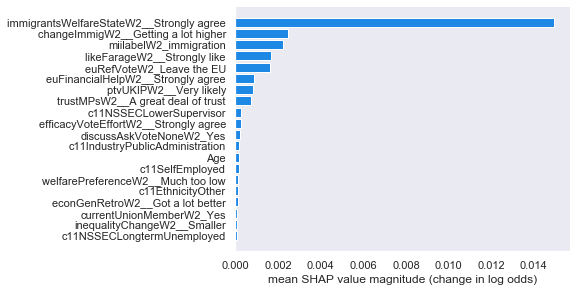

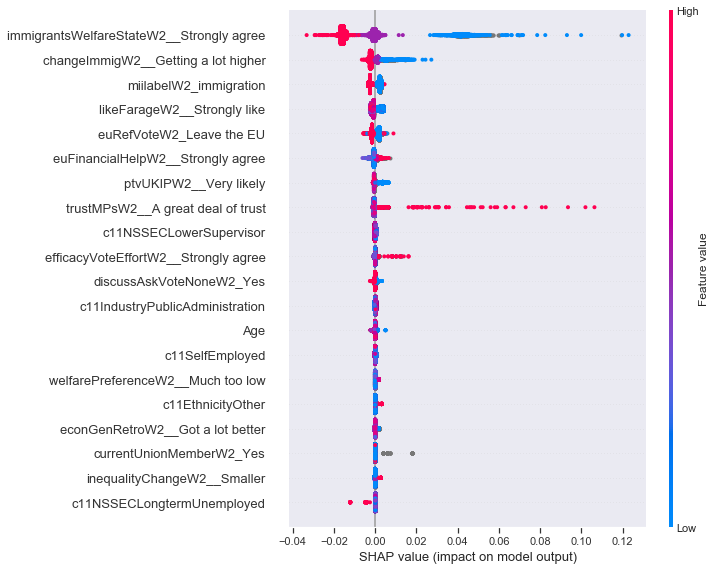

<Figure size 1152x720 with 0 Axes>

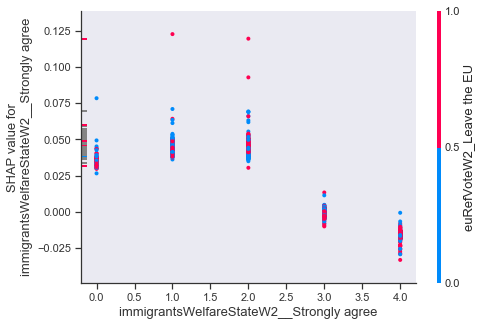

<Figure size 1152x720 with 0 Axes>

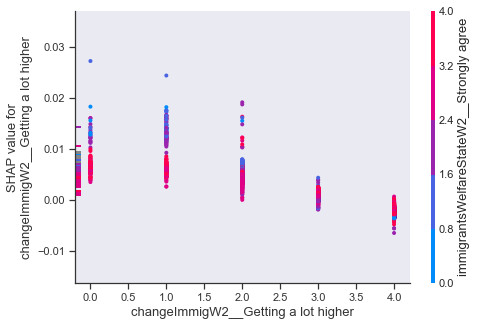

<Figure size 1152x720 with 0 Axes>

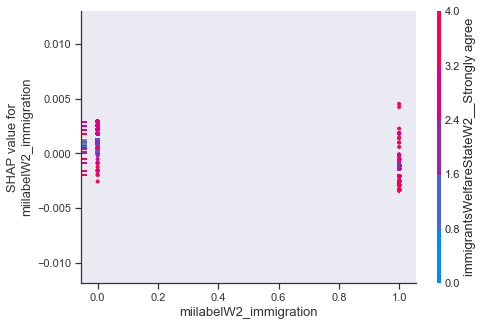

<Figure size 1152x720 with 0 Axes>

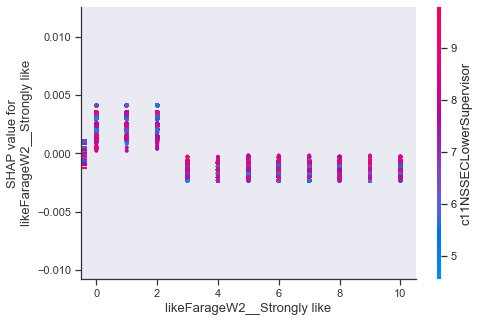

<Figure size 1152x720 with 0 Axes>

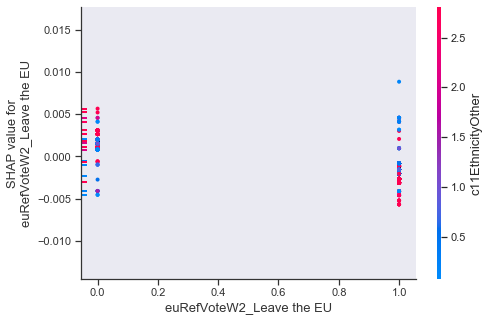

<Figure size 1152x720 with 0 Axes>

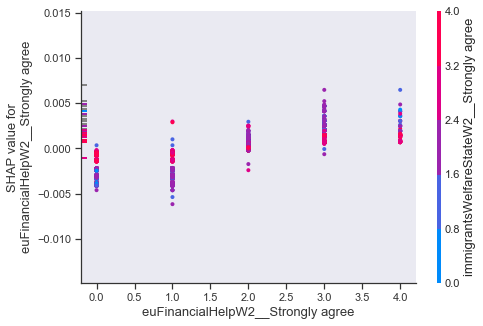

<Figure size 1152x720 with 0 Axes>

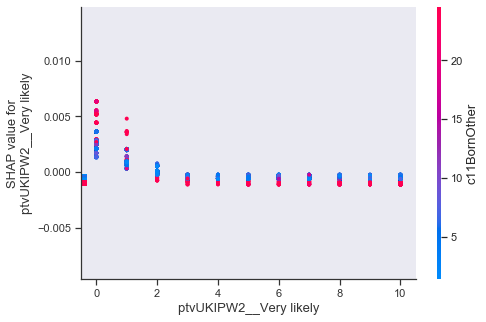

<Figure size 1152x720 with 0 Axes>

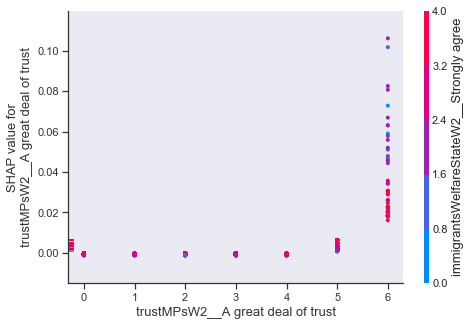

<Figure size 1152x720 with 0 Axes>

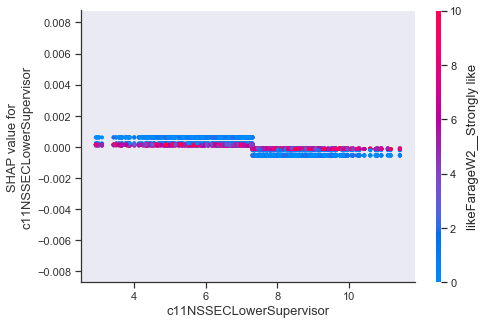

<Figure size 1152x720 with 0 Axes>

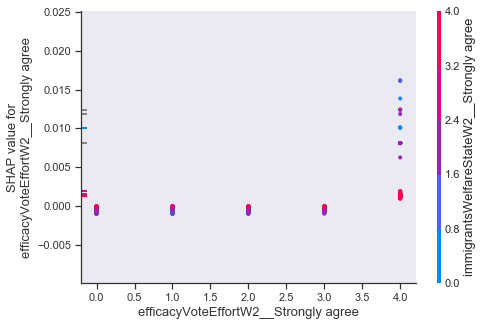

<Figure size 1152x720 with 0 Axes>

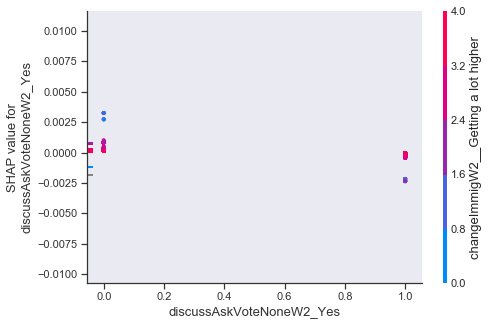

<Figure size 1152x720 with 0 Axes>

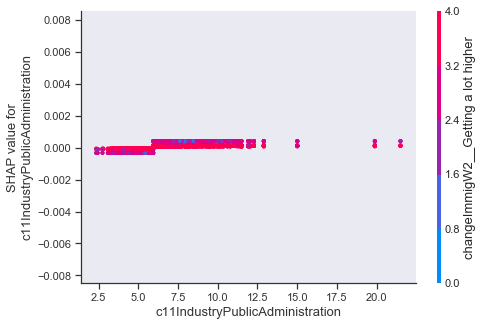

<Figure size 1152x720 with 0 Axes>

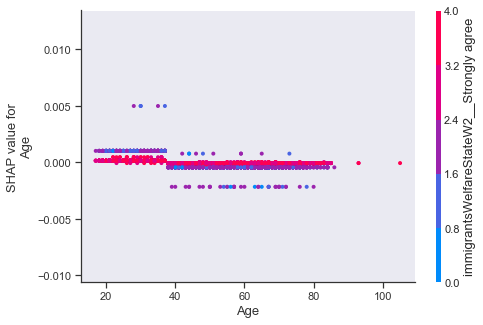

<Figure size 1152x720 with 0 Axes>

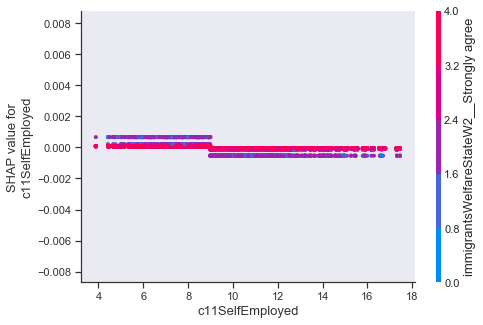

<Figure size 1152x720 with 0 Axes>

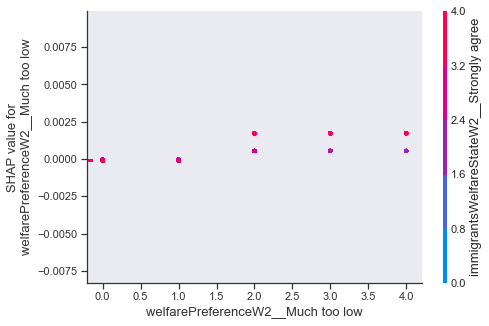

<Figure size 1152x720 with 0 Axes>

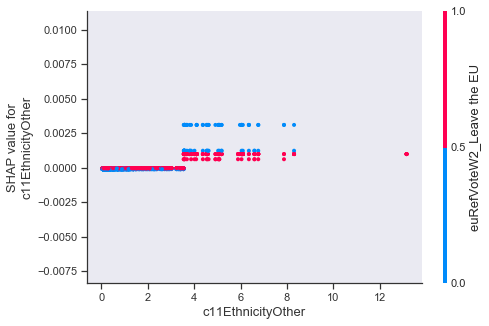

<Figure size 1152x720 with 0 Axes>

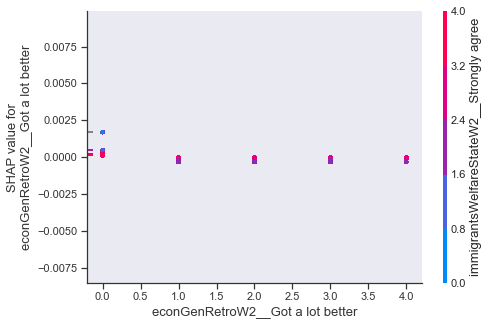

<Figure size 1152x720 with 0 Axes>

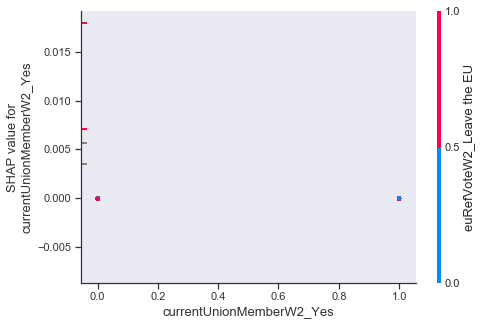

<Figure size 1152x720 with 0 Axes>

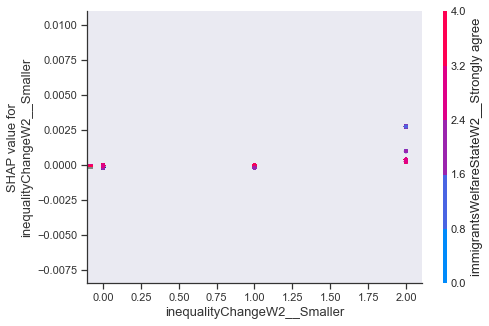

<Figure size 1152x720 with 0 Axes>

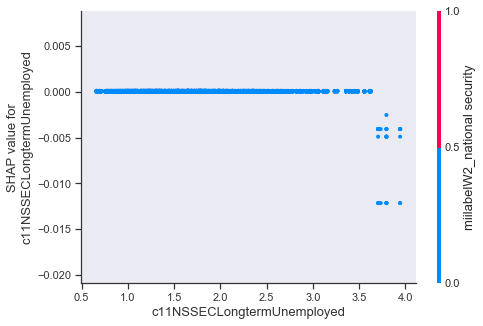

(W2->)immigCult_plus_EcW3 3
missing vals in sample weights: 0


Series.base is deprecated and will be removed in a future version


[18:29:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.503782
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.485594
[2]	validation_0-rmse:0.468352
[3]	validation_0-rmse:0.451707
[4]	validation_0-rmse:0.435828
[5]	validation_0-rmse:0.420698
[6]	validation_0-rmse:0.406254
[7]	validation_0-rmse:0.392555
[8]	validation_0-rmse:0.379313
[9]	validation_0-rmse:0.366845
[10]	validation_0-rmse:0.354897
[11]	validation_0-rmse:0.343459
[12]	validation_0-rmse:0.332623
[13]	validation_0-rmse:0.322316
[14]	validation_0-rmse:0.312473
[15]	validation_0-rmse:0.303232
[16]	validation_0-rmse:0.294469
[17]	validation_0-rmse:0.286143
[18]	validation_0-rmse:0.278175
[19]	validation_0-rmse:0.270766
MSE: 0.07, MAE: 0.24, EV: 0.03, R2: -1.80


Series.base is deprecated and will be removed in a future version


[18:29:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


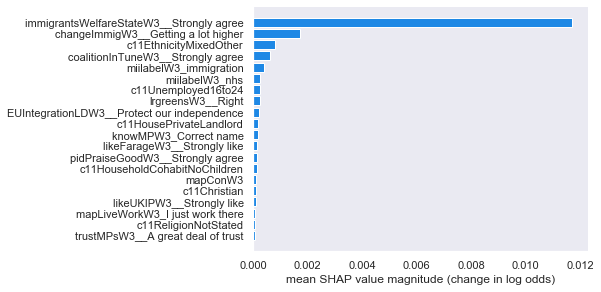

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in less


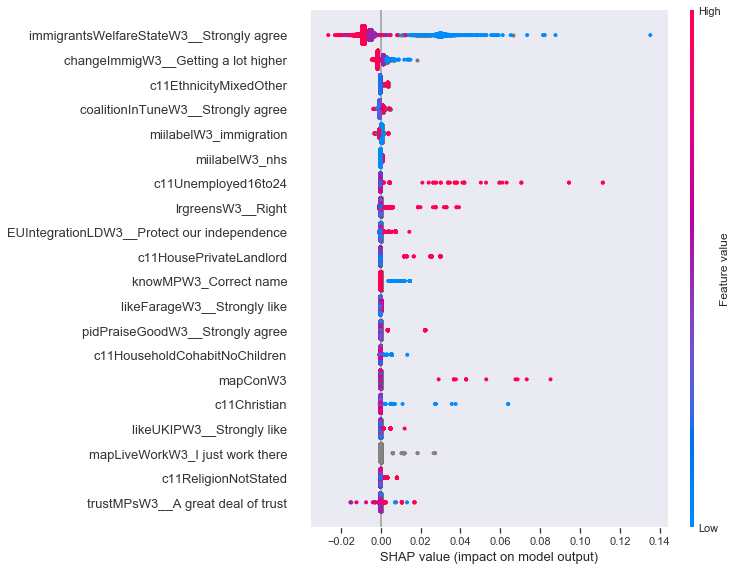

<Figure size 1152x720 with 0 Axes>

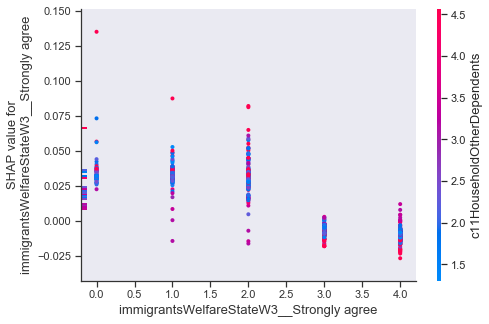

<Figure size 1152x720 with 0 Axes>

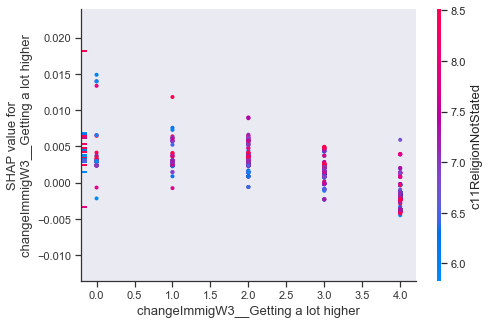

<Figure size 1152x720 with 0 Axes>

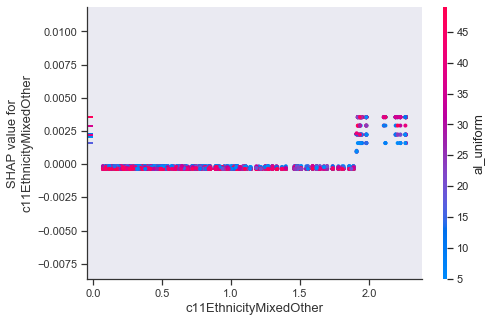

<Figure size 1152x720 with 0 Axes>

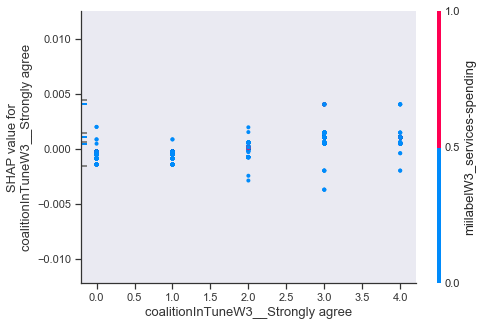

<Figure size 1152x720 with 0 Axes>

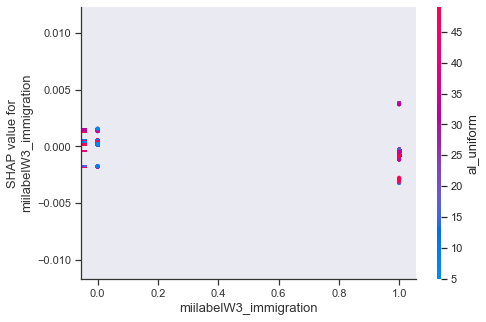

<Figure size 1152x720 with 0 Axes>

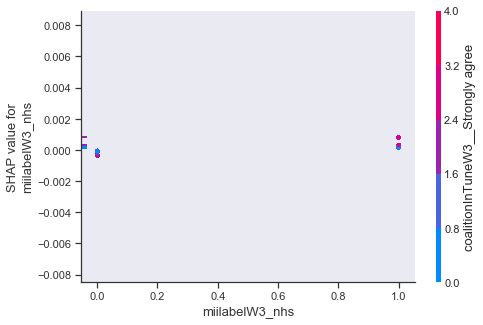

<Figure size 1152x720 with 0 Axes>

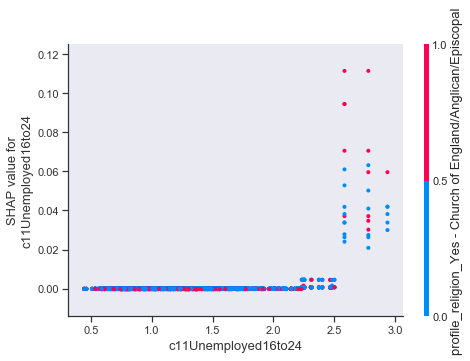

<Figure size 1152x720 with 0 Axes>

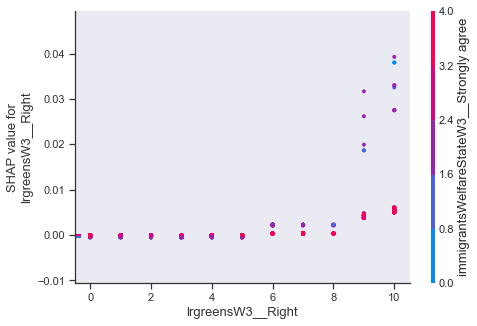

<Figure size 1152x720 with 0 Axes>

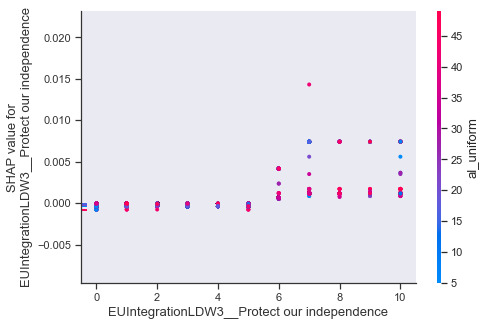

<Figure size 1152x720 with 0 Axes>

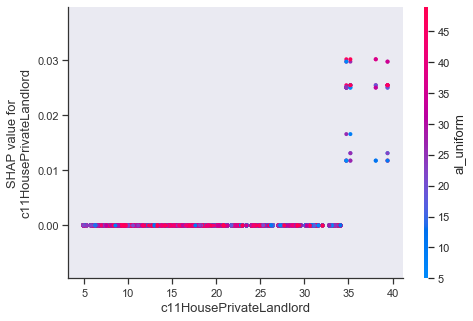

<Figure size 1152x720 with 0 Axes>

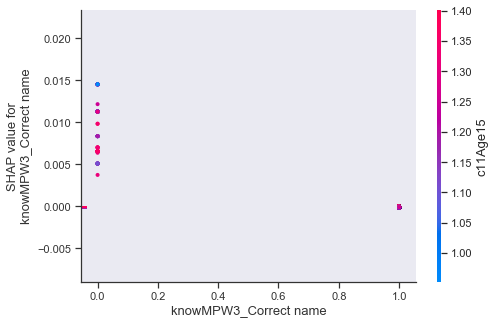

<Figure size 1152x720 with 0 Axes>

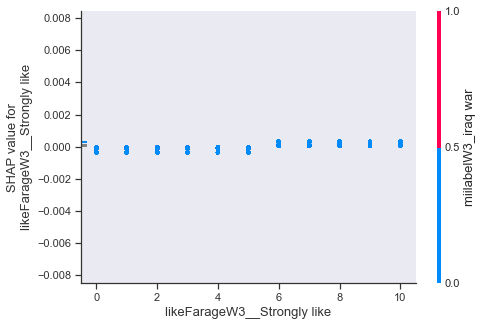

<Figure size 1152x720 with 0 Axes>

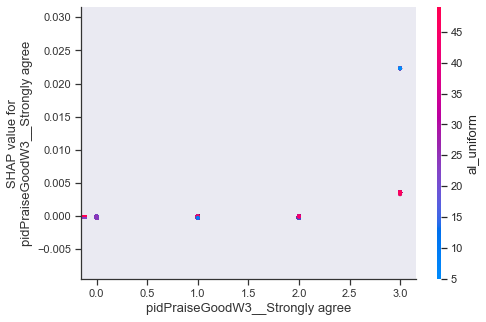

<Figure size 1152x720 with 0 Axes>

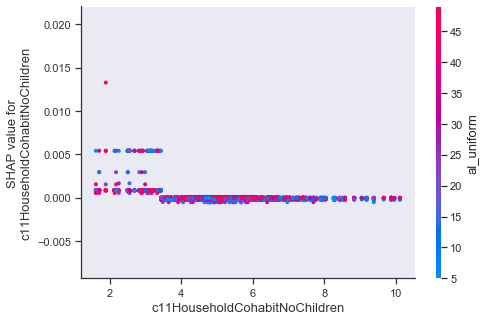

<Figure size 1152x720 with 0 Axes>

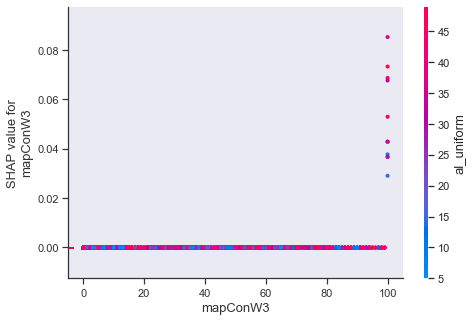

<Figure size 1152x720 with 0 Axes>

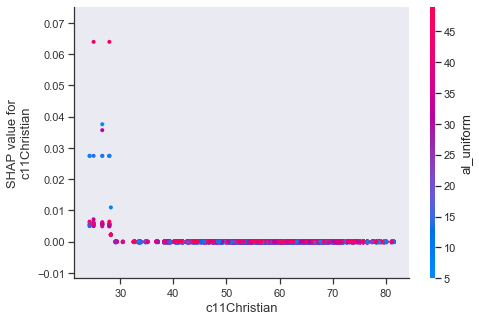

<Figure size 1152x720 with 0 Axes>

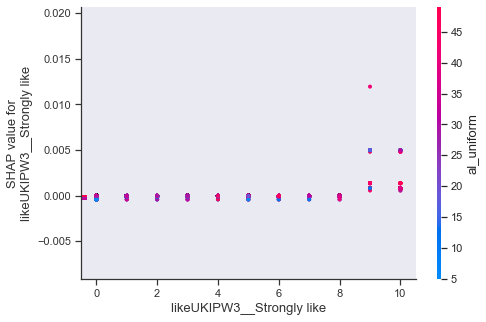

<Figure size 1152x720 with 0 Axes>

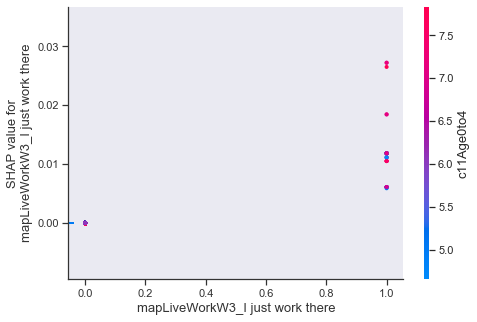

<Figure size 1152x720 with 0 Axes>

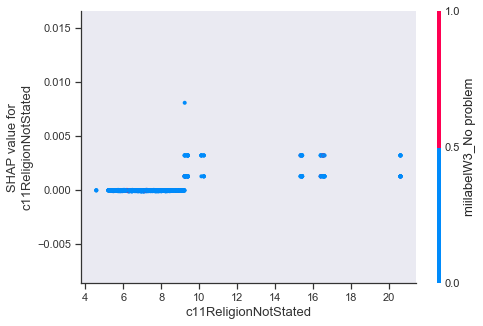

<Figure size 1152x720 with 0 Axes>

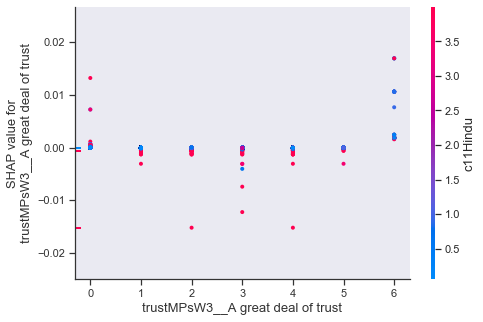

(W3->)immigCult_plus_EcW4 4
missing vals in sample weights: 25


Series.base is deprecated and will be removed in a future version


[18:44:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.42729
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.4129
[2]	validation_0-rmse:0.399164
[3]	validation_0-rmse:0.386063
[4]	validation_0-rmse:0.373525
[5]	validation_0-rmse:0.361679
[6]	validation_0-rmse:0.350301
[7]	validation_0-rmse:0.339478
[8]	validation_0-rmse:0.329408
[9]	validation_0-rmse:0.31967
[10]	validation_0-rmse:0.310459
[11]	validation_0-rmse:0.301662
[12]	validation_0-rmse:0.293347
[13]	validation_0-rmse:0.28545
[14]	validation_0-rmse:0.277982
[15]	validation_0-rmse:0.270863
[16]	validation_0-rmse:0.264113
[17]	validation_0-rmse:0.257696
[18]	validation_0-rmse:0.251646
[19]	validation_0-rmse:0.245987
MSE: 0.06, MAE: 0.21, EV: 0.06, R2: -1.07


Series.base is deprecated and will be removed in a future version


[18:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


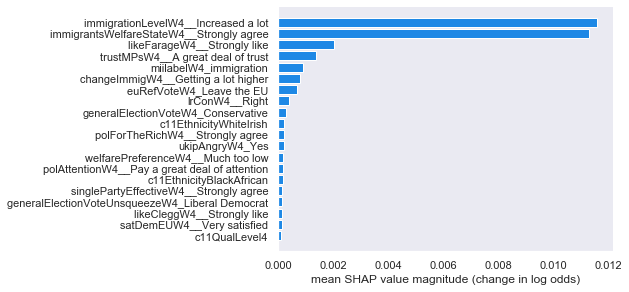

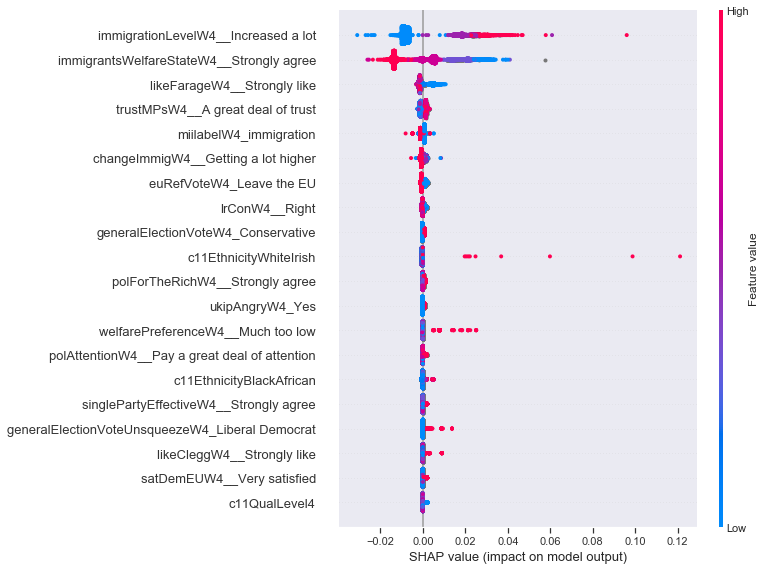

<Figure size 1152x720 with 0 Axes>

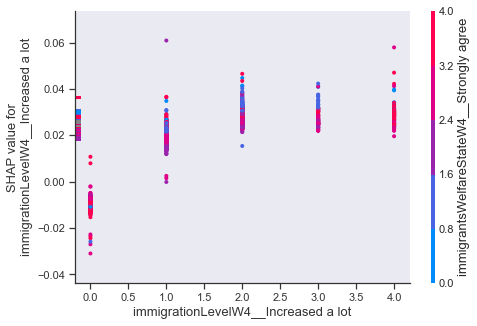

<Figure size 1152x720 with 0 Axes>

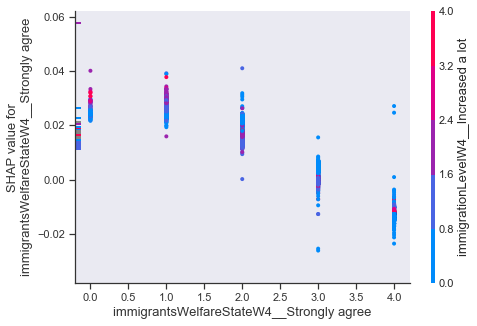

<Figure size 1152x720 with 0 Axes>

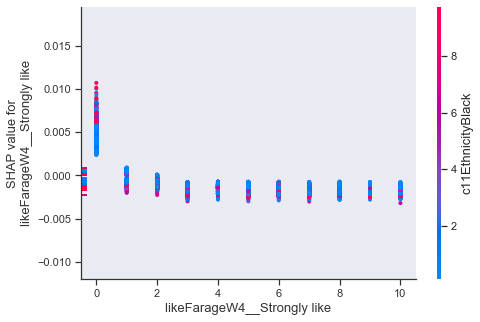

<Figure size 1152x720 with 0 Axes>

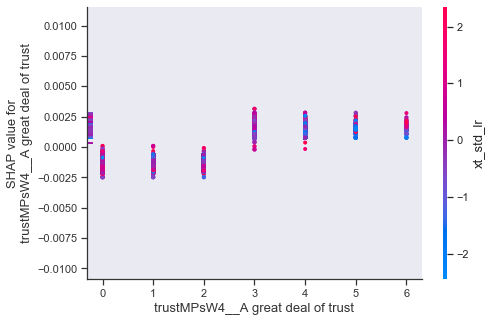

<Figure size 1152x720 with 0 Axes>

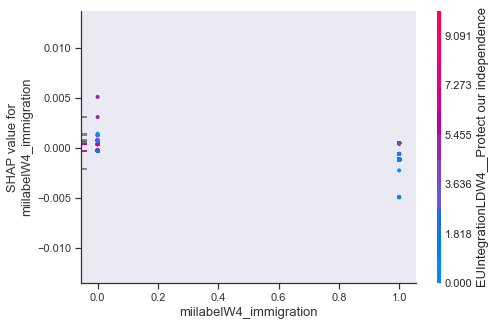

<Figure size 1152x720 with 0 Axes>

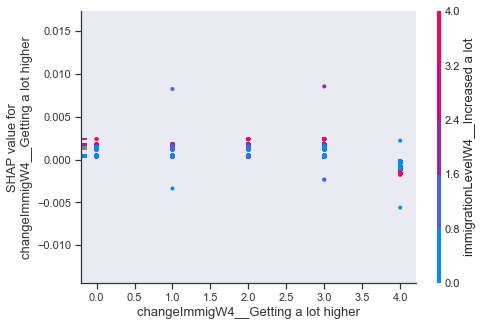

<Figure size 1152x720 with 0 Axes>

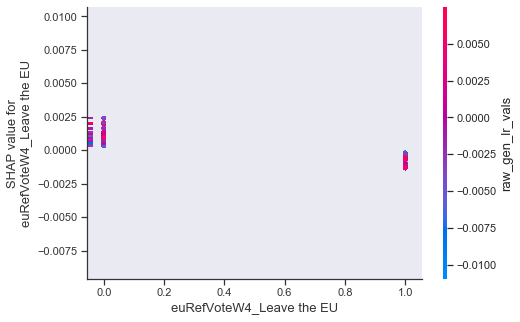

<Figure size 1152x720 with 0 Axes>

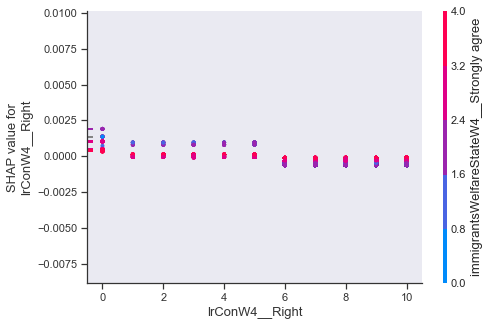

<Figure size 1152x720 with 0 Axes>

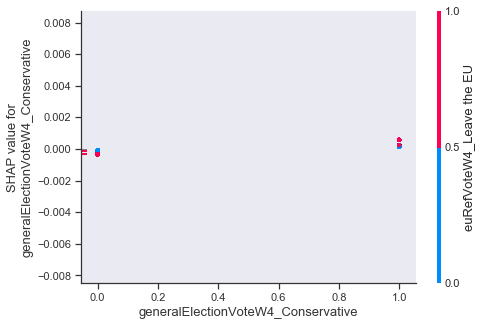

<Figure size 1152x720 with 0 Axes>

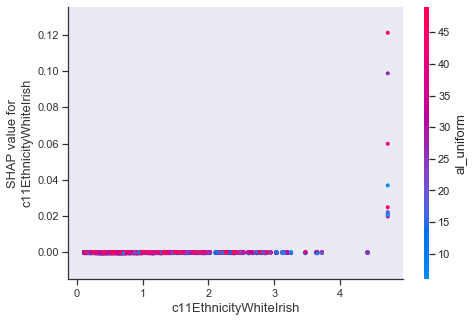

<Figure size 1152x720 with 0 Axes>

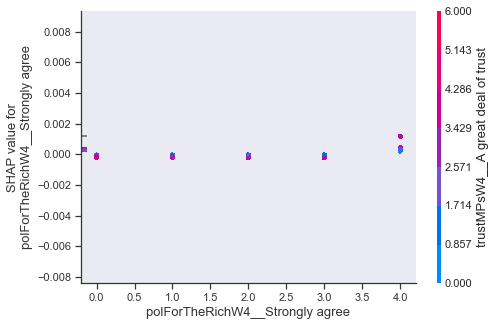

<Figure size 1152x720 with 0 Axes>

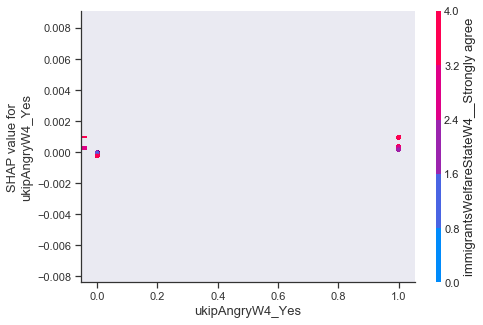

<Figure size 1152x720 with 0 Axes>

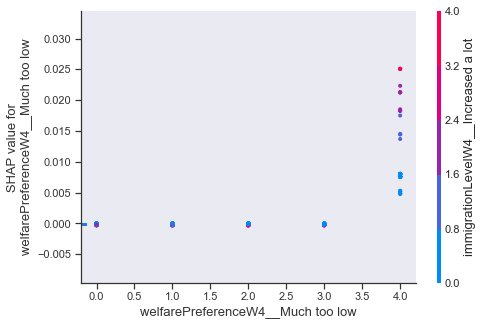

<Figure size 1152x720 with 0 Axes>

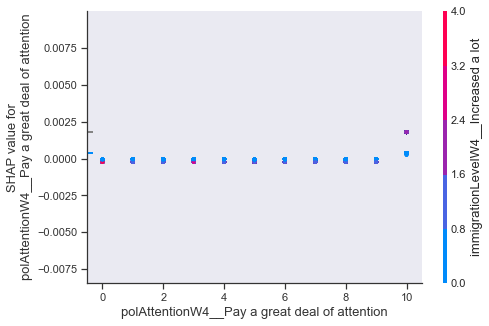

<Figure size 1152x720 with 0 Axes>

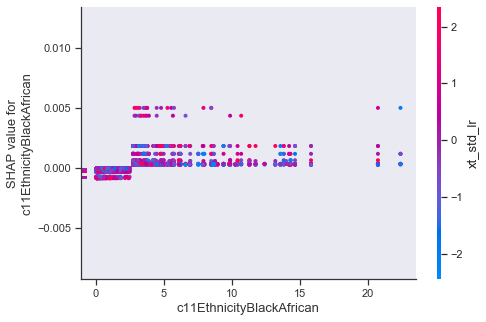

<Figure size 1152x720 with 0 Axes>

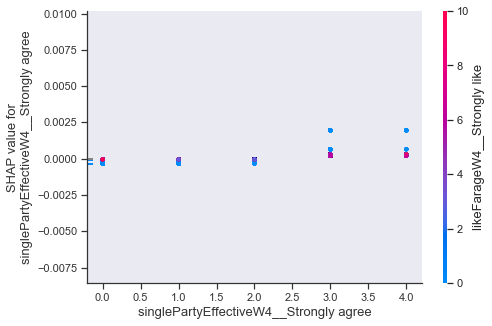

<Figure size 1152x720 with 0 Axes>

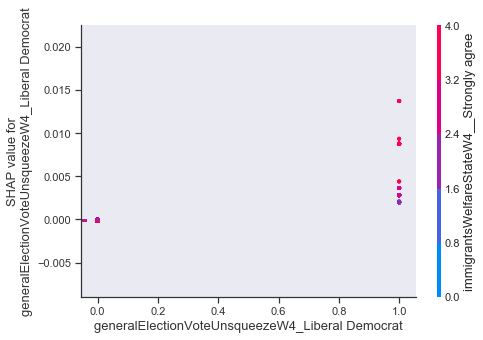

<Figure size 1152x720 with 0 Axes>

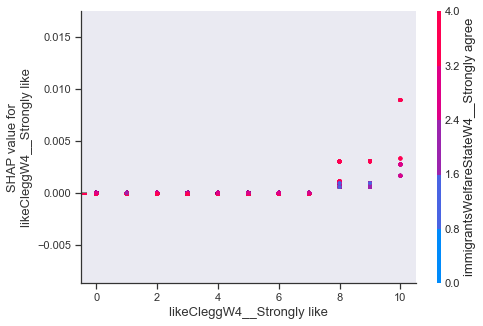

<Figure size 1152x720 with 0 Axes>

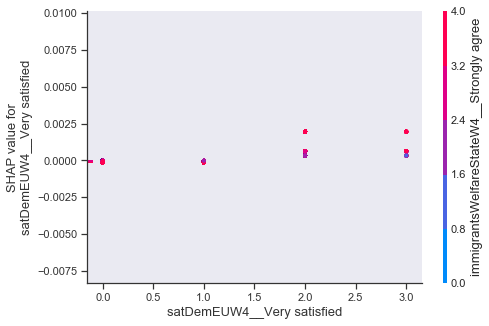

<Figure size 1152x720 with 0 Axes>

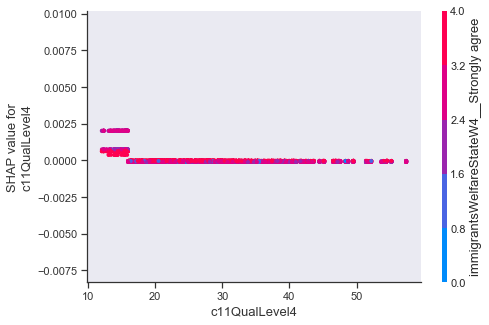

(W4->)immigCult_plus_EcW7 7
missing vals in sample weights: 0


Series.base is deprecated and will be removed in a future version


[19:04:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.484768
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.467711
[2]	validation_0-rmse:0.451443
[3]	validation_0-rmse:0.435765
[4]	validation_0-rmse:0.420926
[5]	validation_0-rmse:0.406847
[6]	validation_0-rmse:0.393368
[7]	validation_0-rmse:0.380511
[8]	validation_0-rmse:0.368287
[9]	validation_0-rmse:0.356588
[10]	validation_0-rmse:0.345501
[11]	validation_0-rmse:0.335007
[12]	validation_0-rmse:0.324936
[13]	validation_0-rmse:0.315435
[14]	validation_0-rmse:0.306404
[15]	validation_0-rmse:0.297847
[16]	validation_0-rmse:0.289746
[17]	validation_0-rmse:0.282036
[18]	validation_0-rmse:0.274767
[19]	validation_0-rmse:0.267841
MSE: 0.07, MAE: 0.23, EV: 0.08, R2: -1.24


Series.base is deprecated and will be removed in a future version


[19:04:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


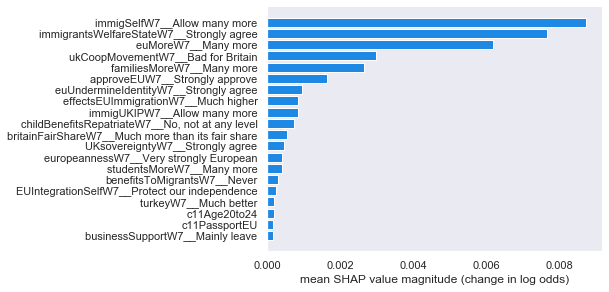

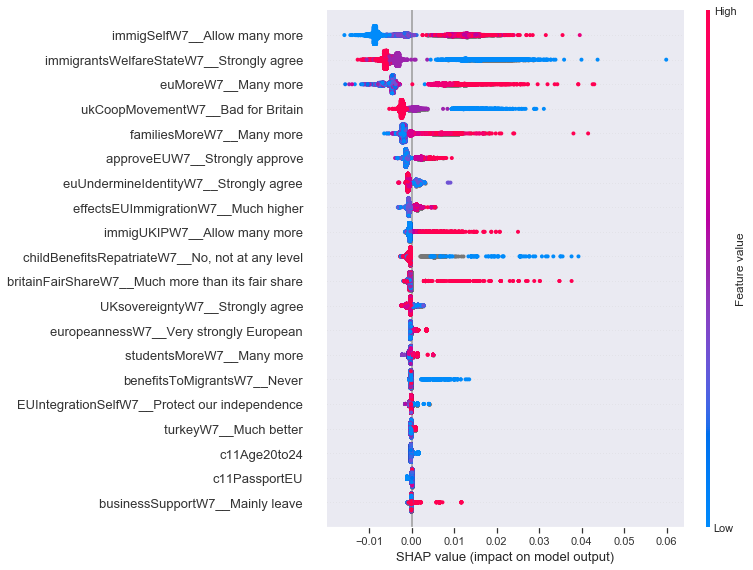

<Figure size 1152x720 with 0 Axes>

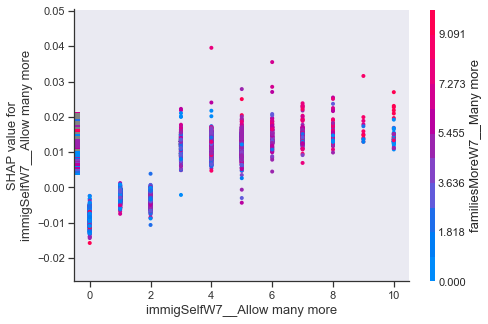

<Figure size 1152x720 with 0 Axes>

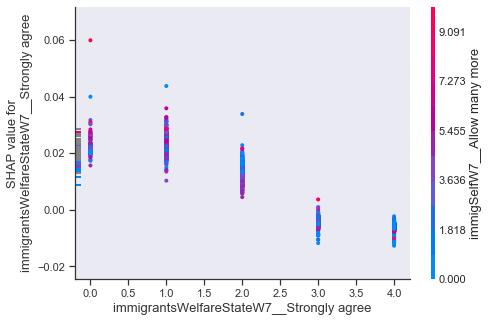

<Figure size 1152x720 with 0 Axes>

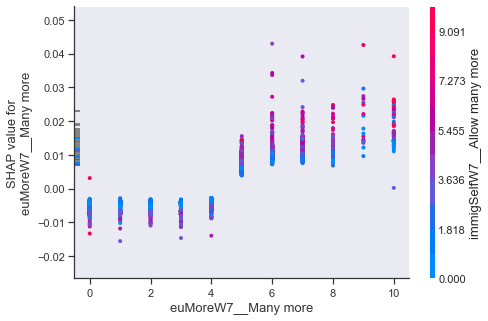

<Figure size 1152x720 with 0 Axes>

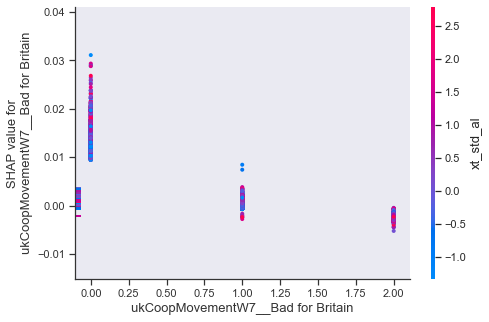

<Figure size 1152x720 with 0 Axes>

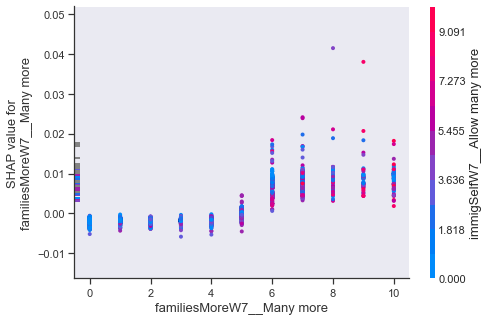

<Figure size 1152x720 with 0 Axes>

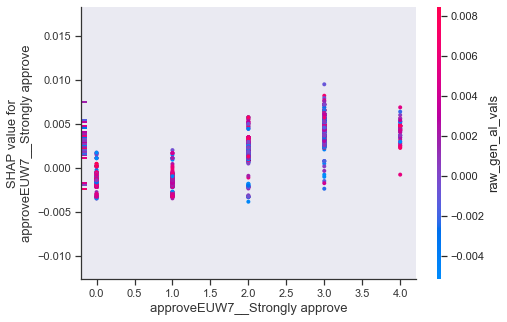

<Figure size 1152x720 with 0 Axes>

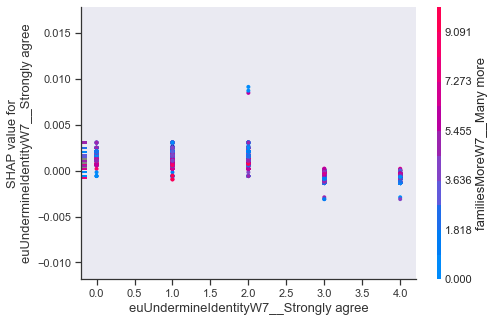

<Figure size 1152x720 with 0 Axes>

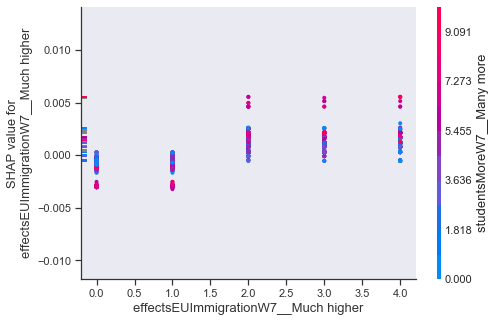

<Figure size 1152x720 with 0 Axes>

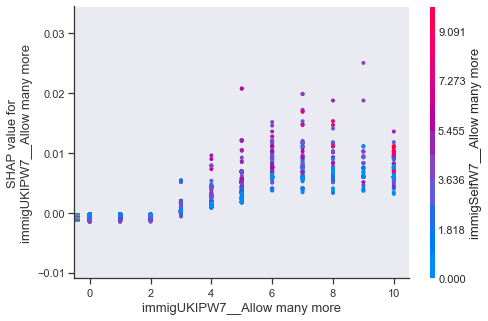

<Figure size 1152x720 with 0 Axes>

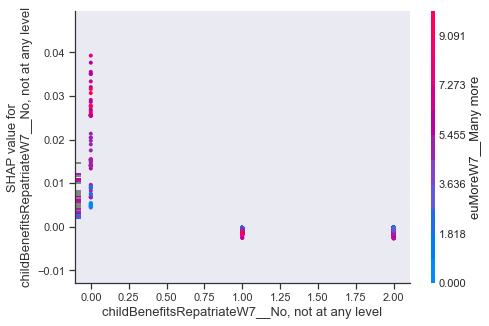

<Figure size 1152x720 with 0 Axes>

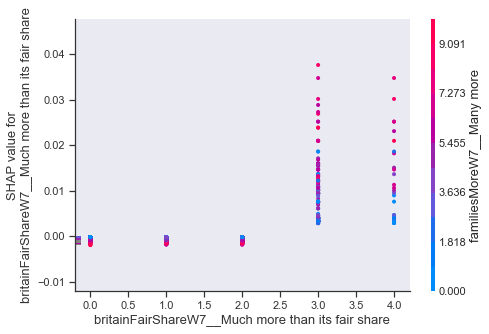

<Figure size 1152x720 with 0 Axes>

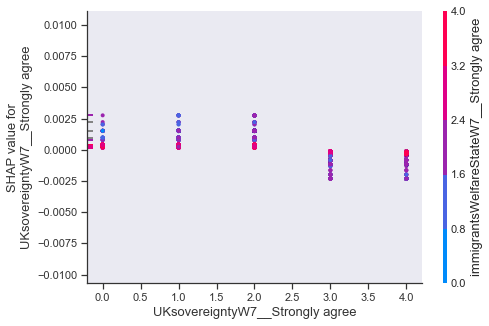

<Figure size 1152x720 with 0 Axes>

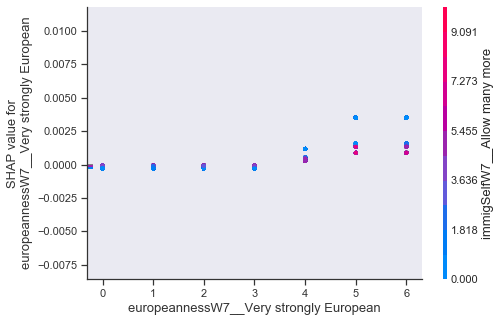

<Figure size 1152x720 with 0 Axes>

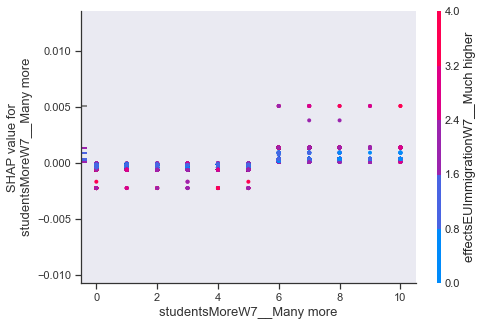

<Figure size 1152x720 with 0 Axes>

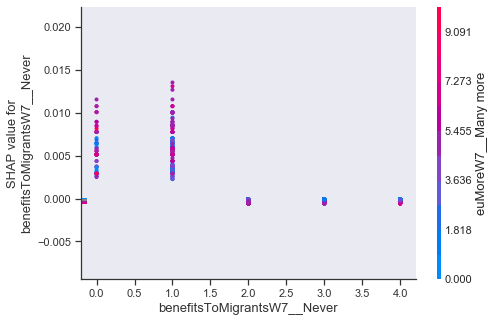

<Figure size 1152x720 with 0 Axes>

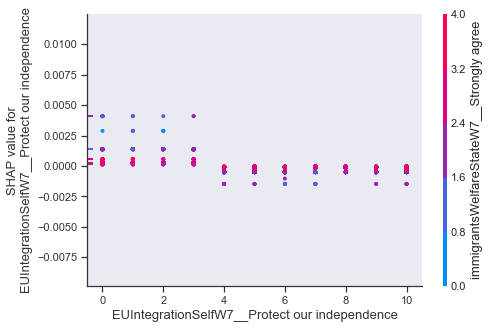

<Figure size 1152x720 with 0 Axes>

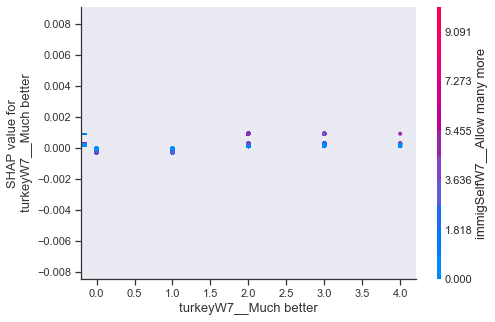

<Figure size 1152x720 with 0 Axes>

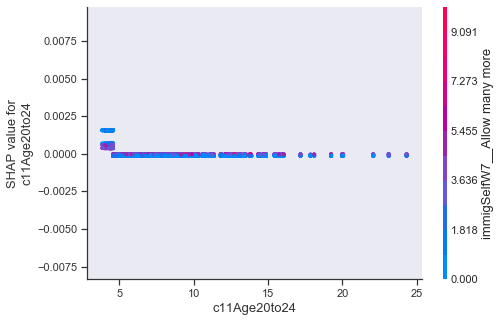

<Figure size 1152x720 with 0 Axes>

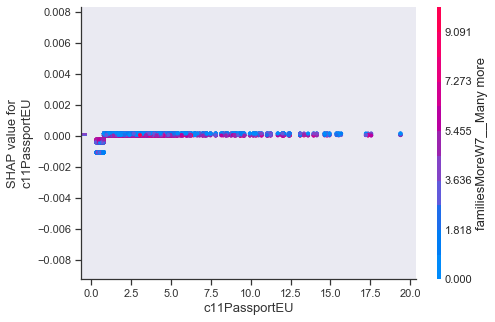

<Figure size 1152x720 with 0 Axes>

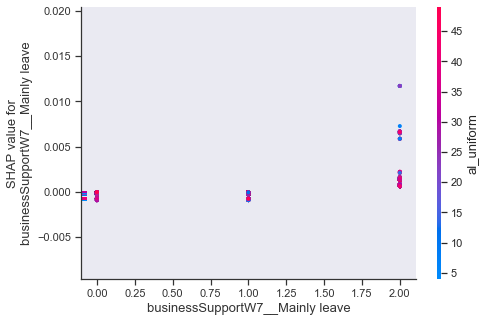

(W7->)immigCult_plus_EcW8 8
missing vals in sample weights: 0


Series.base is deprecated and will be removed in a future version


[19:24:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.470879
Will train until validation_0-rmse hasn't improved in 2.0 rounds.
[1]	validation_0-rmse:0.454144
[2]	validation_0-rmse:0.438142
[3]	validation_0-rmse:0.422863
[4]	validation_0-rmse:0.408483
[5]	validation_0-rmse:0.394661
[6]	validation_0-rmse:0.381364
[7]	validation_0-rmse:0.368672
[8]	validation_0-rmse:0.356626
[9]	validation_0-rmse:0.345086
[10]	validation_0-rmse:0.334157
[11]	validation_0-rmse:0.323705
[12]	validation_0-rmse:0.313763
[13]	validation_0-rmse:0.304306
[14]	validation_0-rmse:0.295376
[15]	validation_0-rmse:0.286838
[16]	validation_0-rmse:0.278729
[17]	validation_0-rmse:0.271157
[18]	validation_0-rmse:0.263945
[19]	validation_0-rmse:0.257178
MSE: 0.07, MAE: 0.23, EV: 0.04, R2: -1.55


Series.base is deprecated and will be removed in a future version


[19:24:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


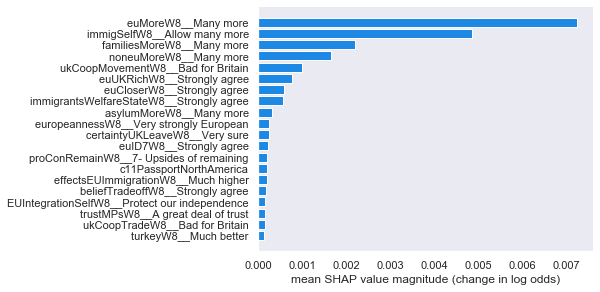

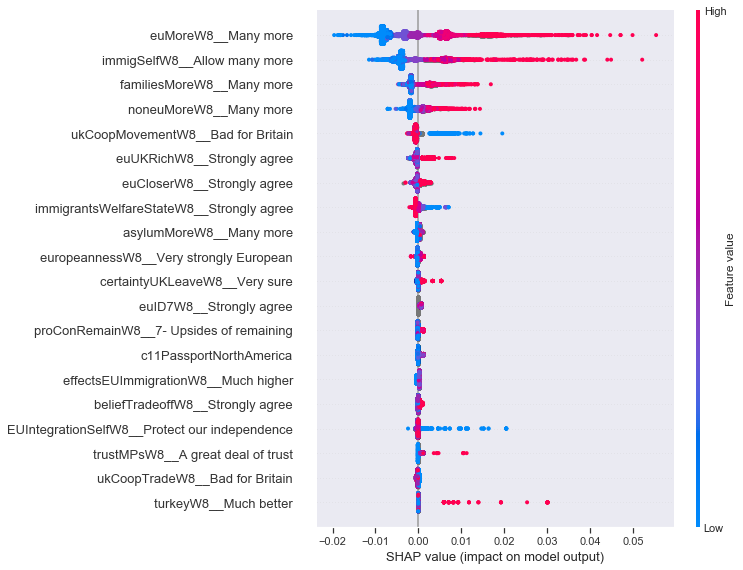

<Figure size 1152x720 with 0 Axes>

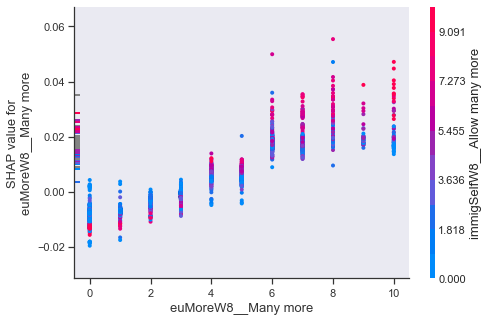

<Figure size 1152x720 with 0 Axes>

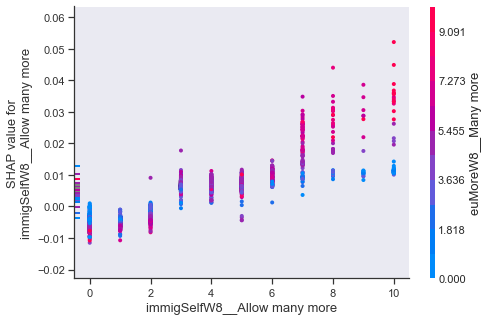

<Figure size 1152x720 with 0 Axes>

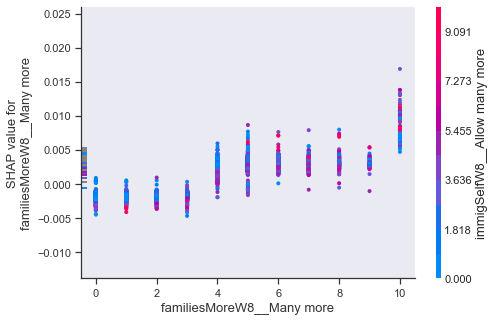

<Figure size 1152x720 with 0 Axes>

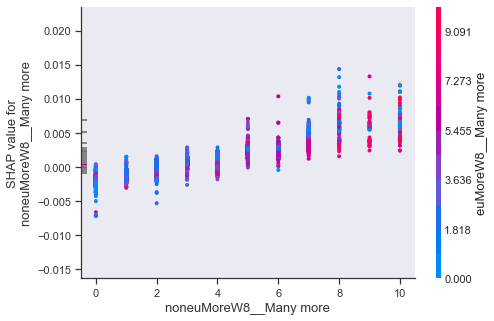

<Figure size 1152x720 with 0 Axes>

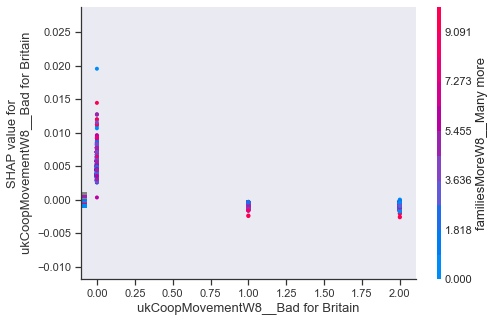

<Figure size 1152x720 with 0 Axes>

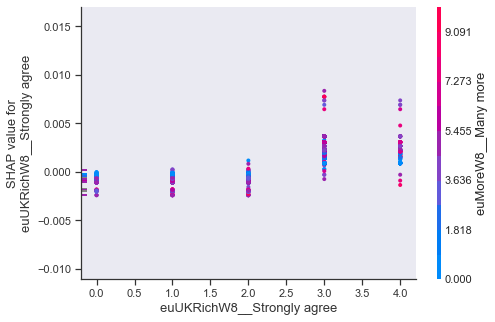

<Figure size 1152x720 with 0 Axes>

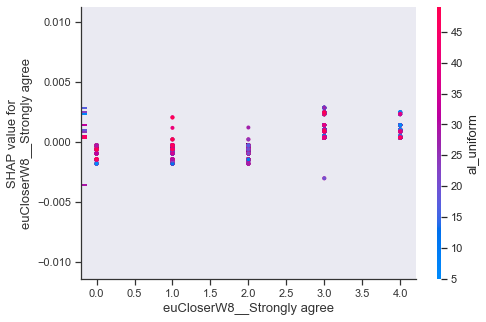

<Figure size 1152x720 with 0 Axes>

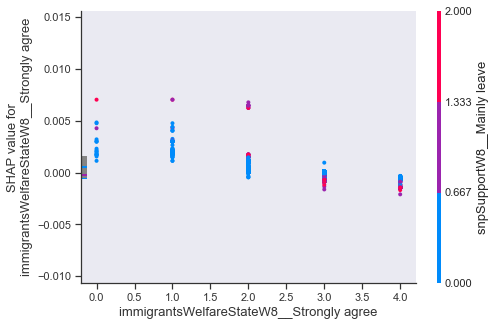

<Figure size 1152x720 with 0 Axes>

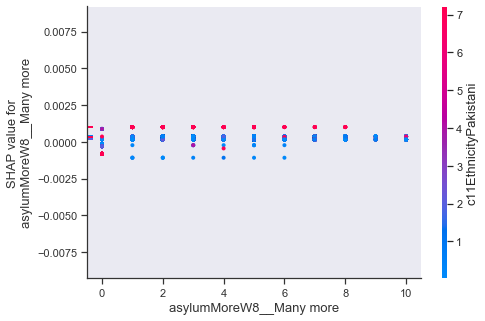

<Figure size 1152x720 with 0 Axes>

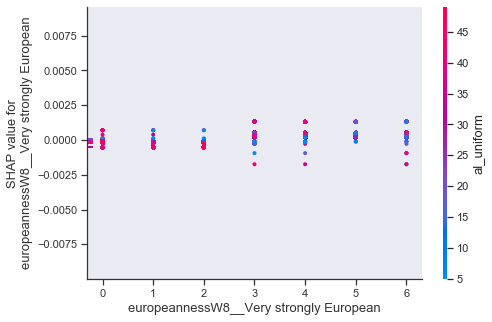

<Figure size 1152x720 with 0 Axes>

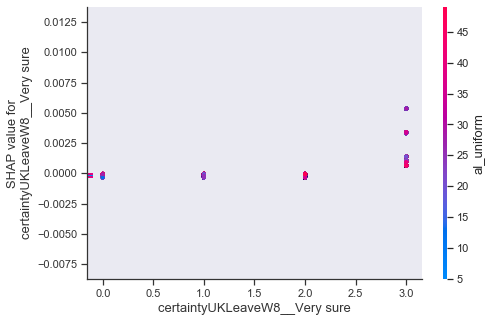

KeyboardInterrupt: 

<Figure size 1152x720 with 0 Axes>

In [105]:
%%time
# target_var = "immigSelfW10__Allow many more"
# weight_var = 'wt_new_W10'  


# 'wt_new_W10'

#'wt_full_W9'
# track base variable in list
for target_var,base_var in zip(var_list,base_list):
    
#     wave_no = 10
    wave_no = int( re.search( 'W(\d+)$', target_var ).groups()[0] )
    weight_var = num_to_weight[wave_no]
    
    print( target_var, wave_no )
    
#     mask  = immigDiff[target_var].notnull()
#     target = immigDiff[target_var][mask]
#     mask = immigDiff[diff_list ].notnull().all(axis=1)
    mask = immigDiff[target_var].notnull()
    base = BES_reduced_with_na[base_var]
#     base_var = base_var +1
#     mask = mask & (base >= base.quantile(0.25)) & (base <=base.quantile(0.75))    
    mask = mask & (base <=base.quantile(0.5))
    target = immigDiff[target_var][mask]
#     target = immigDiff[diff_list ].mean(axis=1)[mask]
    
    
    train  = BES_reduced_with_na[mask].copy()
    train = pd.concat([train,immigDiff[mask]],axis=1)
#     train  = train.drop(target_var, axis=1)    
    
#     mask   = changeImmigCultural.notnull()    
#     target = changeImmigCultural[mask]
    
#     train  = train.drop(target_var, axis=1)
    

    
#     mask   = BES_reduced_with_na[target_var].notnull()
#    target = BES_reduced_with_na[target_var][mask]
#     mask   = train[target_var].notnull()
    
    
    # remove zero variance columns
    train  = train.drop(train.columns[train.var()==0], axis=1)
    
    # add pan_dataset_values columns
    train  = pd.concat([train,pan_dataset_values.drop('id',axis=1)[mask]],axis=1)
    train  = train.drop("genImmigSentiment", axis=1)
    
    # drop variables that definitely involve *some* downsteam component - e.g. target is W4, predictor is W6
    
    other_waves = "("+"|".join([num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]) +")" +"([^0-9]|$)"
    train = train.drop( [x for x in train.columns if re.search(other_waves,x)] , axis=1 )   
    
#     for future_wave in [num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]:
#         train = train.drop([x for x in train.columns if re.search(future_wave+"[^0-9]",x)], axis=1)
#     train = train.drop([x for x in train.columns if ("W10" in x)|("W11" in x)|("W12" in x)|("W13" in x)], axis=1)

    for var_stub in var_stub_list:
        train = train.drop([x for x in train.columns if var_stub in x], axis=1)
    
#     train = train.drop([x for x in train.columns if "immigCultural" in x], axis=1)      
#     train = train.drop([x for x in train.columns if "euRefVote" in x], axis=1)    


    sample_weights = BES_Panel[weight_var][mask]
    print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
    sample_weights = sample_weights.fillna(sample_weights.median())

    output_subfolder = BES_output_folder + "xgboost_test" + os.sep + target_var.replace(">","") + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )


    ############################

    alg = XGBRegressor(
     learning_rate =0.04,
     n_estimators= 20,
     max_depth=3,
     min_child_weight=1,
     gamma=0,
     subsample=0.75,
     colsample_bytree=0.9,
     colsample_bylevel=.85,
     objective= 'reg:linear',
     scale_pos_weight=1.0,
     reg_alpha=0,
     reg_lambda=1,
     njobs=3,
     seed=27)

    # split data into train and test sets
    # fit, validate and find overfitting limit
    seed = 7
    test_size = 0.33

    X_train, X_test, y_train, y_test = train_test_split(pd.concat([train,sample_weights],axis=1), target, test_size=test_size,
                                                        random_state=seed, stratify=round(target))



    eval_set = [(X_test, y_test)]

    sample_weight = X_train[weight_var].values
    sample_weight_eval_set = X_test[weight_var].values
    X_train.drop(weight_var, axis=1, inplace=True)
    X_test.drop(weight_var, axis=1, inplace=True)

    alg.fit(X_train, y_train, eval_metric='rmse', 
            early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
            verbose=True, sample_weight= sample_weight)

    # make predictions for test data
    predictions = alg.predict(X_test)

    # evaluate predictions
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    EV = explained_variance_score(y_test, predictions)
    R2 = r2_score(y_test, predictions)

    print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
    alg.set_params(n_estimators=alg.best_iteration)

    ####################################
    # fit to full dataset at non-overfitting level
    alg.fit(train, target, verbose=True, sample_weight= sample_weights)




    shap_values = shap.TreeExplainer(alg).shap_values(train);


    #################################
    threshold = .1
    min_features = 20
    global_shap_vals = np.abs(shap_values).mean(0)[:-1]
    n_top_features = sum(global_shap_vals[np.argsort(global_shap_vals)]>=threshold)
    if n_top_features <min_features:
        n_top_features = min_features



    ##########################

    inds = np.argsort(global_shap_vals)[-n_top_features:]

    y_pos = np.arange(n_top_features)
    plt.figure(figsize=(16,10))
    plt.barh(y_pos, global_shap_vals[inds], color="#1E88E5")
    plt.yticks(y_pos, train.columns[inds])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("mean SHAP value magnitude (change in log odds)")
    plt.gcf().set_size_inches(6, 4.5)

    plt.savefig(output_subfolder + "mean_impact" + ".png", bbox_inches='tight')

    plt.show()

    ####################
    fig = plt.figure()
    shap.summary_plot(shap_values, train, max_display=n_top_features, plot_type='dot');
    fig.savefig(output_subfolder + "summary_plot" + ".png", bbox_inches='tight')



    ##################
    count = 0
    for name in train.columns[inds[::-1]]:
        fig = plt.figure(figsize = (16,10))    
        shap.dependence_plot(name, shap_values, train)
        fig.savefig(output_subfolder + "featureNo "+str(count) + " " + name.replace("/","_") + ".png", bbox_inches='tight')
        count = count + 1

In [106]:
# 8 variables x 20 (displayed) features x 20 n_estimators -> 15 minutes

In [112]:
output_subfolder

'../BES_analysis_output/xgboost_test\\(W7-)immigCult_plus_EcW8\\'

In [107]:
# other_waves

In [108]:
### Now try with euRefVote

In [109]:
corr = pd.read_hdf(data_subfolder +"corr_dfW13Panel.hdf")

In [110]:
corr

var1                   var2      corr  \
0      generalElectionVoteUnsqueezeW4  generalElectionVoteW4  1.000000   
1        generalElectionVoteSqueezeW4  generalElectionVoteW4  1.000000   
2           generalElectionVotePostW5  generalElectionVoteW5  1.000000   
3      generalElectionVoteUnsqueezeW5  generalElectionVoteW5  1.000000   
4        generalElectionVoteSqueezeW5  generalElectionVoteW5  1.000000   
...                               ...                    ...       ...   
15003            scotRefTurnoutW4_W13           welshnessW11 -0.981981   
15004            scotRefTurnoutW4_W13                lrPCW11 -1.000000   
15005            scotRefTurnoutW4_W13            pcUnitedW12 -1.000000   
15006            scotRefTurnoutW4_W13            pcUnitedW13 -1.000000   
15007            scotRefTurnoutW4_W13         satDemWalesW13 -1.000000   

          var1%     var2%  min var%  
0      0.300823  0.392568  0.300823  
1      0.091745  0.392568  0.091745  
2      0.044590  0.393719  0.044590  
3      0.279344  0.393719  0.279344  
4      0.069785  0.393719  0.069785  
...         ...       ...       ...  
15003  0.108750  0.031169  0.031169  
15004  0.108750  0.021960  0.021960  
15005  0.108750  0.027701  0.027701  
15006  0.108750  0.025107  0.025107  
15007  0.108750  0.030164  0.030164  

[15008 rows x 6 columns]

In [111]:
# Remain = 0, Leave =1, Won't vote/don't know = .5
# Index(['Stay/remain in the EU', 'Leave the EU', 'I would/will not vote',
#        'Don't know'],
for euRefvar in [x for x in BES_Panel.columns if "euRefVoteW" in x]:
    BES_reduced_with_na[euRefvar+'_Leave the EU'] = BES_Panel[euRefvar].cat.codes.replace(-1,np.nan).replace(2,.5).replace(3,.5)

KeyboardInterrupt: 

In [ ]:
# highly correlated variables!
corr[corr["var1"]=='profile_eurefvote']["var2"]

In [ ]:
corr[corr["var1"]=='euRefVoteW13']
# euRefVoteW8	euRefVotePostW8	1.0

In [ ]:
thresh = 0.01 # -> 76 variables
thresh = 0.05 # -> 65 variables!
thresh = 0.1 # -> 134 variables
thresh = 0.5 # -> 134 variables

In [ ]:
%%time
diff_feature_candidate_list = []
for focal_var in [x for x in BES_reduced_with_na.columns if "euRefVote" in x]:
    print(focal_var)
    corr = BES_reduced_with_na.corrwith(BES_reduced_with_na[focal_var])
    ordinal_vars = var_type[ np.logical_and( (var_type["type"]==1) , (var_type["dataset_name"]=="W13_comb") )].index
    reduced_ordinal_vars = [x for x in new_old_col_names.keys() if new_old_col_names[x] in ordinal_vars]
    reduced_corr = corr.loc[reduced_ordinal_vars].sort_values()

    high_corr = reduced_corr[ np.logical_or( reduced_corr< reduced_corr.quantile(thresh) ,
                                             reduced_corr> reduced_corr.quantile(1-thresh) ) ]
    diff_feature_candidate_list.extend(list(high_corr.index))

In [ ]:
temp  = [x for x in diff_feature_candidate_list if re.search("W\d+",x)]
temp2 = [re.match("([a-zA-Z0-9_]+)W\d+",x).groups(0)[0] if re.match("([a-zA-Z0-9_]+)W\d+",x) else x for x in temp ]
imvar_list = list(set(temp2))
# need to replace with proper re matching!

In [ ]:
imvar_list = [ x for x in imvar_list if not re.match("al\d|al_scale|lr\d|lr_scale",x) ]
imvar_list, len(imvar_list)

In [ ]:
imvar_list = [x for x in imvar_list if x not in [ 'handleMIIUKIP','euRefFinalPost','blackEquality','knowf2f2','knowf2f3' ]]
#

# blackEquality creates problems because how do we parse
# ['blackEqualityW1W2W3W4W5__Gone much too far', 'blackEqualityW6_W12__Gone much too far']
# pain in the ass!

In [ ]:
wave_list = [x.split('euRefVote')[1].split("_")[0] for x in BES_reduced_with_na.columns if "euRefVote" in x]
unordered_wave_list = {int(x.split("W")[1].split("_")[0]):x for x in wave_list}
wave_list = [unordered_wave_list[x] for x in sorted(unordered_wave_list.keys())]
wave_list

In [ ]:
num = 0
for im_var in imvar_list:
    print(im_var)
    #wave_list = ['W1', 'W2', 'W3', 'W4', 'W7', 'W8', 'W10', 'W11', 'W13']
    wave_list = []
    immig, mask, skip, wave_list = get_base(im_var,waves = wave_list,noNans = False)
    prev_wave_list = ["W0"]
    prev_wave_list.extend(wave_list)
    prev_wave_dict = {immig.columns[pos]:prev_wave_list[pos] for pos in range(0,len(immig.columns)) }
    if not skip:
        immig.columns = ["("+prev_wave_dict[x]+"->)"+x for x in immig.columns]
        if num ==0:
            immigDiff = immig.diff(axis=1).drop(immig.columns[0],axis=1)
        else:
            immigDiff = pd.concat( [immigDiff, immig.diff(axis=1).drop(immig.columns[0],axis=1)], axis=1)
    num = num + 1
    
null_columns = immigDiff.columns[immigDiff.isnull().all()]
if null_columns.any():
    immigDiff = immigDiff.drop( null_columns[0] , axis=1, errors= 'ignore')

In [ ]:
var_stub_list = ["euRefVote","euRefVotePost","euRefpastVote","profile_eurefvote_Leave the EU"]
var_stub = "euRefVote"
var_list = [x for x in immigDiff.columns if var_stub in x]
unordered_base_dict = {int(x.split("W")[1].split("_")[0]):x for x in BES_reduced_with_na.columns if var_stub in x}
base_list = [unordered_base_dict[x] for x in sorted(unordered_base_dict.keys())][0:len(var_list)]

In [ ]:
base_list

In [ ]:
import shap

In [ ]:
%%time
# target_var = "immigSelfW10__Allow many more"
# weight_var = 'wt_new_W10'  


# 'wt_new_W10'

#'wt_full_W9'
# track base variable in list
for target_var, base_var in zip(var_list,base_list):
    
    n_estimators = 2000
    
#     wave_no = 10
    wave_no = int( re.search( 'W(\d+)$', target_var ).groups()[0] )
    weight_var = num_to_weight[wave_no]
    
    print( target_var, wave_no )
    
#     mask  = immigDiff[target_var].notnull()
#     target = immigDiff[target_var][mask]
#     mask = immigDiff[diff_list ].notnull().all(axis=1)
    
    mask = immigDiff[target_var].notnull()
    mask = mask & (BES_Panel["country"]=="England")
    mask = mask & (BES_Panel["profile_eurefvote"]=="Leave the EU")
    base = BES_reduced_with_na[base_var]
#     base_var = base_var +1
#     mask = mask & (base >= base.quantile(0.25)) & (base <=base.quantile(0.75))    


    # to avoid shifts being biased 
#     mask = mask & (base <=base.quantile(0.5))
    target = immigDiff[target_var][mask]
#     target = immigDiff[diff_list ].mean(axis=1)[mask]
    
    
#     train  = BES_reduced_with_na[mask].copy()
#     train = pd.concat([train,immigDiff[mask]],axis=1)
    train = immigDiff[mask]

#     train  = train.drop(target_var, axis=1)    
    
#     mask   = changeImmigCultural.notnull()    
#     target = changeImmigCultural[mask]
    
#     train  = train.drop(target_var, axis=1)
    

    
#     mask   = BES_reduced_with_na[target_var].notnull()
#    target = BES_reduced_with_na[target_var][mask]
#     mask   = train[target_var].notnull()
    
    
    # remove zero variance columns
    train  = train.drop(train.columns[train.var()==0], axis=1)
    
    # add pan_dataset_values columns
#     train  = pd.concat([train,pan_dataset_values.drop('id',axis=1)[mask]],axis=1)
#     train  = train.drop("genImmigSentiment", axis=1)
#     train  = train.drop(["xt_std_lr","xt_std_al","lr_uniform","al_uniform"], axis=1)
    
    # drop variables that definitely involve *some* downsteam component - e.g. target is W4, predictor is W6
    
    other_waves = "("+"|".join([num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]) +")" +"([^0-9-]|$)"
    train = train.drop( [x for x in train.columns if re.search(other_waves,x)] , axis=1 )   
    
#     for future_wave in [num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]:
#         train = train.drop([x for x in train.columns if re.search(future_wave+"[^0-9]",x)], axis=1)
#     train = train.drop([x for x in train.columns if ("W10" in x)|("W11" in x)|("W12" in x)|("W13" in x)], axis=1)

    for var_stub in var_stub_list:
        train = train.drop([x for x in train.columns if var_stub in x], axis=1)
    
#     train = train.drop([x for x in train.columns if "immigCultural" in x], axis=1)      
#     train = train.drop([x for x in train.columns if "euRefVote" in x], axis=1)    


    sample_weights = BES_Panel[weight_var][mask]
    print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
    sample_weights = sample_weights.fillna(sample_weights.median())

    output_subfolder = BES_output_folder + "xgboost_test_England_only_diff_only_more_vars_leave_only_no_pan_dataset" + os.sep + target_var.replace(">","") + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )


    ############################

    alg = XGBRegressor(
     learning_rate =0.04,
     n_estimators= n_estimators,
     max_depth=3,
     min_child_weight=1,
     gamma=0,
     subsample=0.95,
     colsample_bytree=0.9,
     colsample_bylevel=.85,
     objective= 'reg:linear',
     scale_pos_weight=1.0,
     reg_alpha=0,
     reg_lambda=1,
     njobs=3,
     seed=27)

    # split data into train and test sets
    # fit, validate and find overfitting limit
    seed = 7
    test_size = 0.33

    X_train, X_test, y_train, y_test = train_test_split(pd.concat([train,sample_weights],axis=1), target, test_size=test_size,
                                                        random_state=seed, stratify=round(target))



    eval_set = [(X_test, y_test)]

    sample_weight = X_train[weight_var].values
    sample_weight_eval_set = X_test[weight_var].values
    X_train.drop(weight_var, axis=1, inplace=True)
    X_test.drop(weight_var, axis=1, inplace=True)

    alg.fit(X_train, y_train, eval_metric='rmse', 
            early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
            verbose=True, sample_weight= sample_weight)

    # make predictions for test data
    predictions = alg.predict(X_test)

    # evaluate predictions
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    EV = explained_variance_score(y_test, predictions)
    R2 = r2_score(y_test, predictions)

    print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
    alg.set_params(n_estimators=alg.best_iteration)

    ####################################
    # fit to full dataset at non-overfitting level
    alg.fit(train, target, verbose=True, sample_weight= sample_weights)




    shap_values = shap.TreeExplainer(alg).shap_values(train);


    #################################
    threshold = .1
    min_features = 20
    global_shap_vals = np.abs(shap_values).mean(0)[:-1]
    n_top_features = sum(global_shap_vals[np.argsort(global_shap_vals)]>=threshold)
    if n_top_features <min_features:
        n_top_features = min_features



    ##########################

    inds = np.argsort(global_shap_vals)[-n_top_features:]

    y_pos = np.arange(n_top_features)
    plt.figure(figsize=(16,10))
    plt.barh(y_pos, global_shap_vals[inds], color="#1E88E5")
    plt.yticks(y_pos, train.columns[inds])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("mean SHAP value magnitude (change in log odds)")
    plt.gcf().set_size_inches(6, 4.5)

    plt.savefig(output_subfolder + "mean_impact" + ".png", bbox_inches='tight')

    plt.show()

    ####################
    fig = plt.figure()
    shap.summary_plot(shap_values, train, max_display=n_top_features, plot_type='dot');
    fig.savefig(output_subfolder + "summary_plot" + ".png", bbox_inches='tight')



    ##################
    count = 0
    for name in train.columns[inds[::-1]]:
        fig = plt.figure(figsize = (16,10))    
        shap.dependence_plot(name, shap_values, train)
        fig.savefig(output_subfolder + "featureNo "+str(count) + " " + name.replace("/","_").replace(">","") + ".png", bbox_inches='tight')
        count = count + 1

In [ ]:
%%time
# target_var = "immigSelfW10__Allow many more"
# weight_var = 'wt_new_W10'  
save_folder_base = 

# 'wt_new_W10'

#'wt_full_W9'
# track base variable in list
for target_var, base_var in zip(var_list,base_list):
    
    n_estimators = 2000
    
#     wave_no = 10
    wave_no = int( re.search( 'W(\d+)$', target_var ).groups()[0] )
    weight_var = num_to_weight[wave_no]
    
    print( target_var, wave_no )
    
#     mask  = immigDiff[target_var].notnull()
#     target = immigDiff[target_var][mask]
#     mask = immigDiff[diff_list ].notnull().all(axis=1)
    
    mask = immigDiff[target_var].notnull()
    mask = mask & (BES_Panel["country"]=="England")
    mask = mask & (BES_Panel["profile_eurefvote"]=="Stay/remain in the EU")
    base = BES_reduced_with_na[base_var]
#     base_var = base_var +1
#     mask = mask & (base >= base.quantile(0.25)) & (base <=base.quantile(0.75))    


    # to avoid shifts being biased 
#     mask = mask & (base <=base.quantile(0.5))
    target = immigDiff[target_var][mask]
#     target = immigDiff[diff_list ].mean(axis=1)[mask]
    
    
#     train  = BES_reduced_with_na[mask].copy()
#     train = pd.concat([train,immigDiff[mask]],axis=1)
    train = immigDiff[mask]

#     train  = train.drop(target_var, axis=1)    
    
#     mask   = changeImmigCultural.notnull()    
#     target = changeImmigCultural[mask]
    
#     train  = train.drop(target_var, axis=1)
    

    
#     mask   = BES_reduced_with_na[target_var].notnull()
#    target = BES_reduced_with_na[target_var][mask]
#     mask   = train[target_var].notnull()
    
    
    # remove zero variance columns
    train  = train.drop(train.columns[train.var()==0], axis=1)
    
    # add pan_dataset_values columns
#     train  = pd.concat([train,pan_dataset_values.drop('id',axis=1)[mask]],axis=1)
#     train  = train.drop("genImmigSentiment", axis=1)
#     train  = train.drop(["xt_std_lr","xt_std_al","lr_uniform","al_uniform"], axis=1)
    
    # drop variables that definitely involve *some* downsteam component - e.g. target is W4, predictor is W6
    
    other_waves = "("+"|".join([num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]) +")" +"([^0-9-]|$)"
    train = train.drop( [x for x in train.columns if re.search(other_waves,x)] , axis=1 )   
    
#     for future_wave in [num_to_wave[x] for x in range(1,14) if (x>wave_no) or (x<wave_no) ]:
#         train = train.drop([x for x in train.columns if re.search(future_wave+"[^0-9]",x)], axis=1)
#     train = train.drop([x for x in train.columns if ("W10" in x)|("W11" in x)|("W12" in x)|("W13" in x)], axis=1)

    for var_stub in var_stub_list:
        train = train.drop([x for x in train.columns if var_stub in x], axis=1)
    
#     train = train.drop([x for x in train.columns if "immigCultural" in x], axis=1)      
#     train = train.drop([x for x in train.columns if "euRefVote" in x], axis=1)    


    sample_weights = BES_Panel[weight_var][mask]
    print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
    sample_weights = sample_weights.fillna(sample_weights.median())

    output_subfolder = BES_output_folder + "xgboost_test_England_only_diff_only_more_vars_remain_only_no_pan_dataset" + os.sep + target_var.replace(">","") + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )


    ############################

    alg = XGBRegressor(
     learning_rate =0.04,
     n_estimators= n_estimators,
     max_depth=3,
     min_child_weight=1,
     gamma=0,
     subsample=0.95,
     colsample_bytree=0.9,
     colsample_bylevel=.85,
     objective= 'reg:linear',
     scale_pos_weight=1.0,
     reg_alpha=0,
     reg_lambda=1,
     njobs=3,
     seed=27)

    # split data into train and test sets
    # fit, validate and find overfitting limit
    seed = 7
    test_size = 0.33

    X_train, X_test, y_train, y_test = train_test_split(pd.concat([train,sample_weights],axis=1), target, test_size=test_size,
                                                        random_state=seed, stratify=round(target))



    eval_set = [(X_test, y_test)]

    sample_weight = X_train[weight_var].values
    sample_weight_eval_set = X_test[weight_var].values
    X_train.drop(weight_var, axis=1, inplace=True)
    X_test.drop(weight_var, axis=1, inplace=True)

    alg.fit(X_train, y_train, eval_metric='rmse', 
            early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
            verbose=True, sample_weight= sample_weight)

    # make predictions for test data
    predictions = alg.predict(X_test)

    # evaluate predictions
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    EV = explained_variance_score(y_test, predictions)
    R2 = r2_score(y_test, predictions)

    print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
    alg.set_params(n_estimators=alg.best_iteration)

    ####################################
    # fit to full dataset at non-overfitting level
    alg.fit(train, target, verbose=True, sample_weight= sample_weights)




    shap_values = shap.TreeExplainer(alg).shap_values(train);


    #################################
    threshold = .1
    min_features = 20
    global_shap_vals = np.abs(shap_values).mean(0)[:-1]
    n_top_features = sum(global_shap_vals[np.argsort(global_shap_vals)]>=threshold)
    if n_top_features <min_features:
        n_top_features = min_features



    ##########################

    inds = np.argsort(global_shap_vals)[-n_top_features:]

    y_pos = np.arange(n_top_features)
    plt.figure(figsize=(16,10))
    plt.barh(y_pos, global_shap_vals[inds], color="#1E88E5")
    plt.yticks(y_pos, train.columns[inds])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("mean SHAP value magnitude (change in log odds)")
    plt.gcf().set_size_inches(6, 4.5)

    plt.savefig(output_subfolder + "mean_impact" + ".png", bbox_inches='tight')

    plt.show()

    ####################
    fig = plt.figure()
    shap.summary_plot(shap_values, train, max_display=n_top_features, plot_type='dot');
    fig.savefig(output_subfolder + "summary_plot" + ".png", bbox_inches='tight')



    ##################
    count = 0
    for name in train.columns[inds[::-1]]:
        fig = plt.figure(figsize = (16,10))    
        shap.dependence_plot(name, shap_values, train)
        fig.savefig(output_subfolder + "featureNo "+str(count) + " " + name.replace("/","_").replace(">","") + ".png", bbox_inches='tight')
        count = count + 1

In [ ]:
{'colsample_bytree': 0.85,
 'learning_rate': 0.045,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 0.95}

In [ ]:
## find best settings!

alg = XGBRegressor(
 learning_rate =0.045,
 n_estimators= 400,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.95,
 colsample_bytree=0.9,
 colsample_bylevel=.85,
 objective= 'reg:linear',
 scale_pos_weight=1.0,
 reg_alpha=0,
 reg_lambda=1,
 njobs=3,
 seed=27)

In [ ]:
# {'colsample_bytree': 0.85,
#  'learning_rate': 0.045,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'subsample': 0.95}

In [ ]:
param_test1 ={
 'max_depth':[3],
 'min_child_weight':[1],
 'learning_rate':[0.04, .06,],
 'subsample':[.5, .95],
 'colsample_bytree':[0.85, .15],
 'gamma':[0,0.1]
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

gsearch1 = GridSearchCV(estimator = alg,
                        param_grid = param_test1,
                        scoring='neg_mean_squared_error', #'r2'
                        n_jobs=4, 
                        iid=False,
                        cv=skf,
                        verbose=True)

gsearch1.fit(X_train, (y_train*2).astype('int'), eval_metric='rmse', 
        early_stopping_rounds=alg.get_params()['n_estimators']*.1, eval_set=eval_set,
        verbose=True, sample_weight= sample_weight)


# , sample_weight= sample_weight

display(gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_)

In [ ]:
# {'colsample_bytree': 0.85,
#  'learning_rate': 0.045,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'subsample': 0.95}
# -0.17520214185999716

# {'colsample_bytree': 0.85,
#  'learning_rate': 0.055,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'subsample': 0.8}
# -0.17572028001260384

# {'colsample_bytree': 0.85,
#  'learning_rate': 0.06,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'subsample': 0.8}
# -0.17565352870293557

# {'colsample_bytree': 0.85,
#  'gamma': 0,
#  'learning_rate': 0.04,
#  'max_depth': 3,
#  'min_child_weight': 1,
#  'subsample': 0.95}
# -0.17551413568254737

In [ ]:
pan_dataset_values.corr()

In [ ]:
[x for x in BES_Panel.columns if "ns_sec" in x]

In [ ]:
BES_Panel['ns_secW1W2W3W4W5'].cat.categories

In [ ]:
BES_Panel['ns_sec_analyticW1W2W3W4W5'].cat.categories

In [ ]:
BES_reduced['profile_gross_personal__£100,000 and over']
BES_Panel['profile_gross_personal']

In [ ]:
# https://theotherlifenow.com/occupations-and-their-ideologies/
# money on y axis, ideology on bottom axis




In [ ]:
ns_sec = BES_Panel[['ns_secW1W2W3W4W5', 'ns_secW6W7W8W9']].bfill(axis=1).iloc[:, 0]




In [ ]:
ns_sec_present = ns_sec.notnull()

In [ ]:
income_present = BES_reduced['profile_gross_personal__£100,000 and over'].notnull()
BES_reduced['profile_gross_personal__£100,000 and over']

In [ ]:

pan_dataset_values['lr_uniform']

In [ ]:
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
[x for x in BES_Panel.columns if "profile_eurefvote" in x.lower()]
# ['renationaliseRailW10', 'renationaliseRailW11', 'renationaliseRailW12']
# ['UKsovereigntyW7', 'UKsovereigntyW8', 'UKsovereigntyPostW10', 'UKsovereigntyPostW11', 'UKsovereigntyPostW13']
# ['EUMIICategoryW7', 'euMIISmallW7', 'EUMIICategoryW8', 'euMIISmallW8']
# ['profile_eurefvote']

In [ ]:
BES_Panel['UKsovereigntyW7']